In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:\Learnbay DSC Course\Coupon project\Data.csv")
data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
data.shape

(12684, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [5]:
# Data Preprocessing 

#1) Check for missimg values 

In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [7]:
(data.isnull().sum()/len(data))*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [8]:
# Feature Car has 99% of missing data , hence that variable can be dropped 

data = data.drop(['car'],axis = 1)
data.shape

(12684, 24)

In [9]:
# Other features with missing data 
# Bar                      0.843582
# CoffeeHouse              1.710817
# CarryAway                1.190476
# RestaurantLessThan20     1.024913
# Restaurant20To50         1.490066

In [10]:
# Finding data type for imputing the missing values 
print(data['Bar'].dtype)
data['Bar'].describe()

object


count     12577
unique        5
top       never
freq       5197
Name: Bar, dtype: object

In [11]:
data['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [12]:
# Since 'Bar' feature is an object type , imputing the missing values with mode 

data['Bar'] = data['Bar'].fillna('never')

In [13]:
print(data['CoffeeHouse'].dtype)
data['CoffeeHouse'].describe()

object


count     12467
unique        5
top       less1
freq       3385
Name: CoffeeHouse, dtype: object

In [14]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [15]:
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')

In [16]:
print(data['CarryAway'].dtype)

object


In [17]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [18]:
data['CarryAway'] = data['CarryAway'].fillna('1~3')
data['CarryAway'].isnull().sum()

0

In [19]:
data['RestaurantLessThan20'].dtype

dtype('O')

In [20]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [21]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')
data['RestaurantLessThan20'].isnull().sum()

0

In [22]:
data['Restaurant20To50'].dtype

dtype('O')

In [23]:
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [24]:
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')
data['Restaurant20To50'].isnull().sum()

0

In [25]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [26]:
#All missing values are treated 

In [27]:
# To see if there are any unexpected formats in the data set 

for i in data.columns :
    print('_______________________________________ ' , i , 
          '_____________________________________________')
    print()
    print(set(data[i].tolist()))

_______________________________________  destination _____________________________________________

{'Work', 'Home', 'No Urgent Place'}
_______________________________________  passanger _____________________________________________

{'Friend(s)', 'Kid(s)', 'Partner', 'Alone'}
_______________________________________  weather _____________________________________________

{'Sunny', 'Snowy', 'Rainy'}
_______________________________________  temperature _____________________________________________

{80, 30, 55}
_______________________________________  coupon _____________________________________________

{'Bar', 'Restaurant(20-50)', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)'}
_______________________________________  expiration _____________________________________________

{'1d', '2h'}
_______________________________________  gender _____________________________________________

{'Male', 'Female'}
_______________________________________  age ______________________________

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64


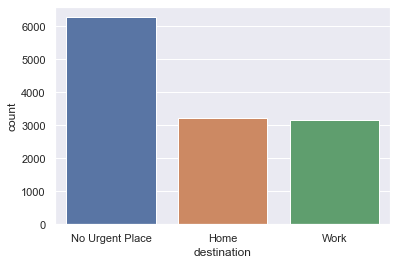

In [28]:
# Seing the destination variable 
# How are customers accepting the coupons ?
# iF it is on the way home , or if when have no urgent place too go
print(data['destination'].value_counts())
sns.countplot(x = 'destination' , data = data)
plt.show()

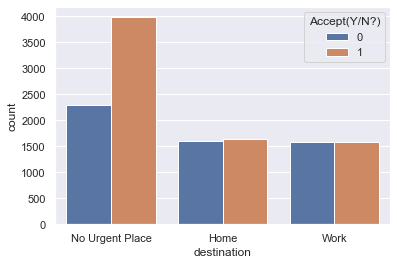

In [29]:
# We see that most of the customers driving are not is a hurry to go to work or home 
# Let us see the acceptance of coupon by such customers

sns.countplot(x = 'destination' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

In [30]:
print(len(data[(data['destination'] == 'No Urgent Place') & (data['Accept(Y/N?)'] == 1)]))

3982


We see that 3982 Customers who are travelling else where apart from Home or work have accepted coupons 

In [31]:
print(len(data[(data['destination'] == 'Home') & (data['Accept(Y/N?)'] == 1)]))

1639


We see that 1639 Customers who are travelling to Home have accepted coupons

In [32]:
print(len(data[(data['destination'] == 'Work') & (data['Accept(Y/N?)'] == 1)]))

1589


We see that 1639 Customers who are travelling to work have accepted coupons

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64


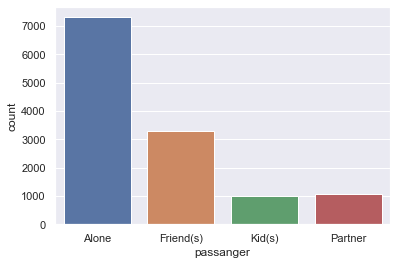

In [33]:
# Passanger 
print(data['passanger'].value_counts())
sns.countplot(x = 'passanger' , data = data)
plt.show()

Most customers are travelling alone 

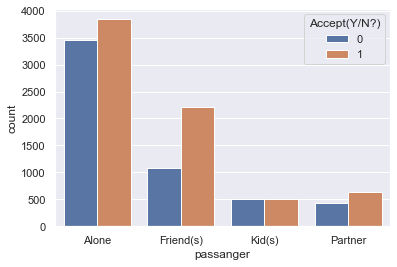

In [34]:
sns.countplot(x = 'passanger' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

We can observe that coupon acceptance rate is more with passengers travelling alone

In [35]:
# Given weather feature

for i in data.select_dtypes(include = ['object']).columns:
    sns.boxplot

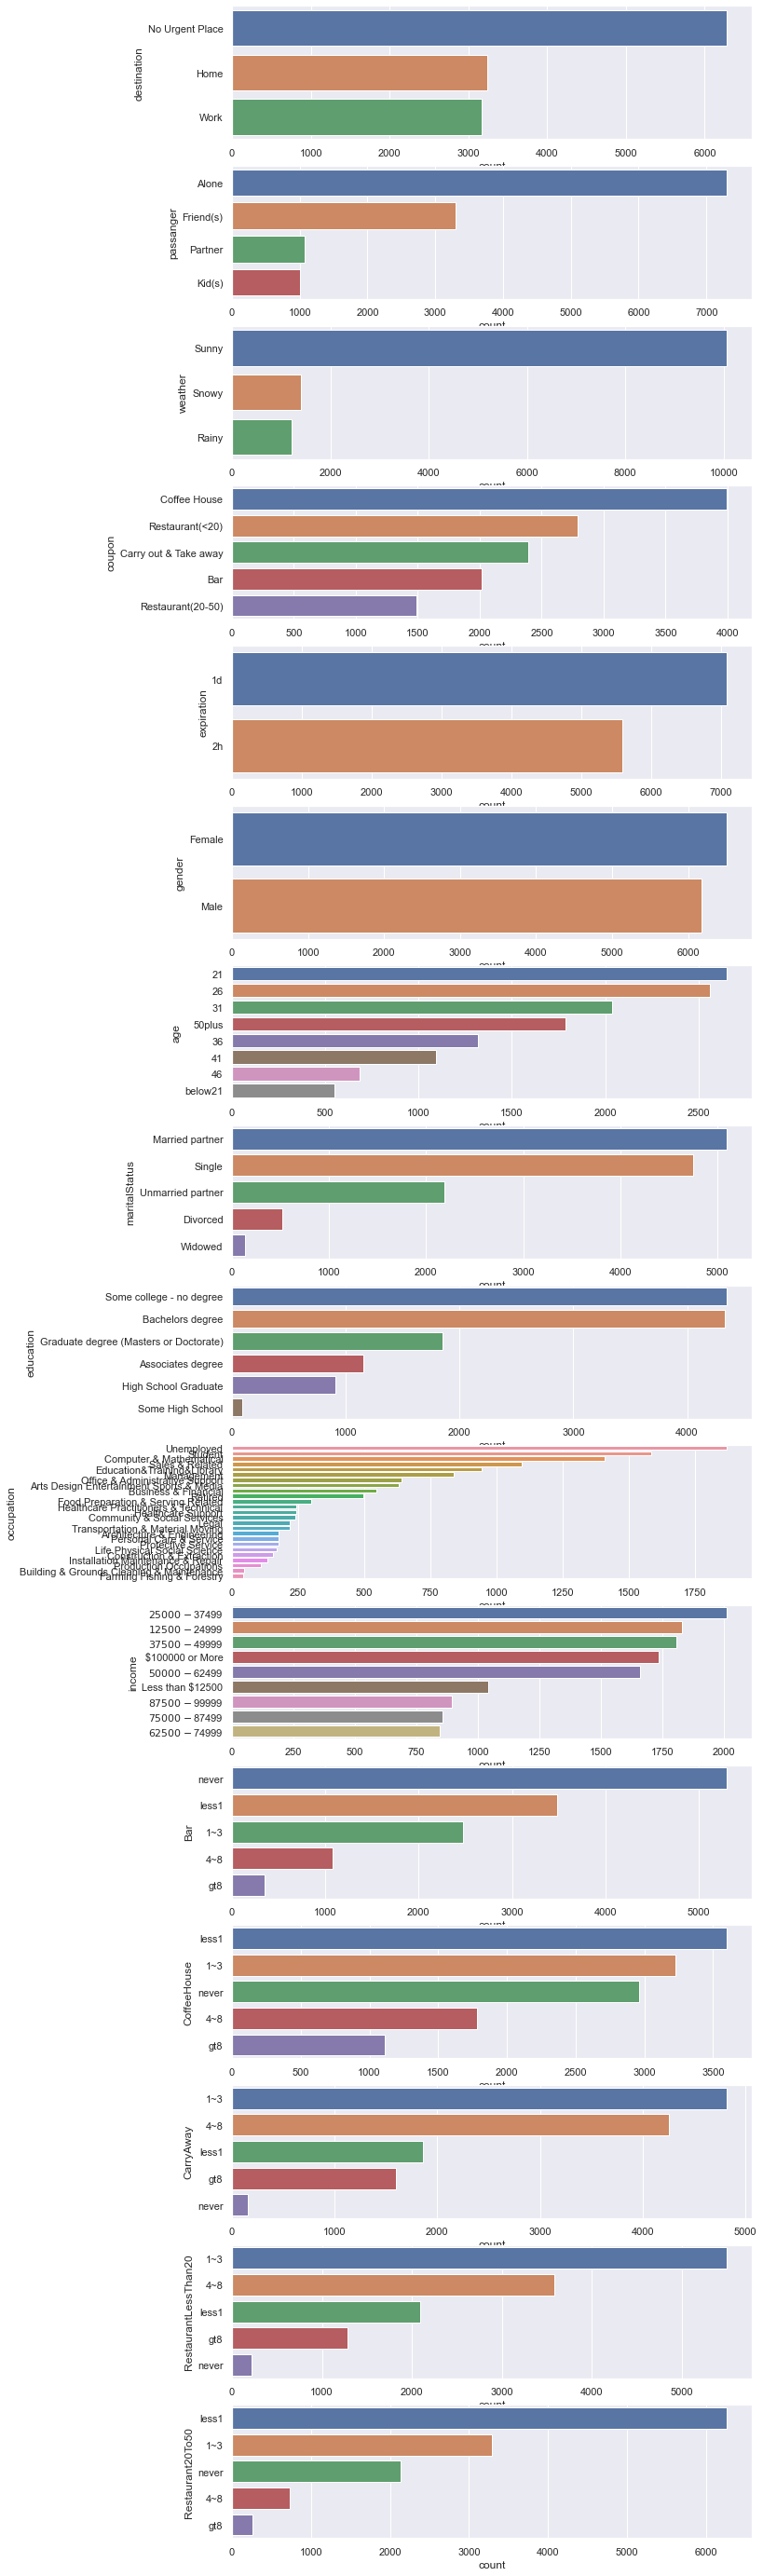

In [36]:
pd.set_option('display.max_rows' , 20)
fig , axes = plt.subplots(16 , 1 , figsize = (10,50))
axes = axes.flatten()

for ax , col in zip(axes , data.select_dtypes(include = ['object']).columns):
    sns.countplot( y = col , data = data , ax = ax , order = data[col].value_counts().index)
plt.show()



In [37]:
# Inference from the above plots

# Most cutomers travelling have no urgent place to go
# Most customers are travelling alone 
# Most cutomers are travelling when it is a sunny day 
# Most coupons distributed are from Coffee House and Restaurant with an average spend of less than 20 $ 
# Most coupons distributed are with an expiration of 1d 
# Most customers recorded are Female pasengers
# Most customers belong to age group of 21-31
# Most customers are married 
# Most customers are not degree holders meaning they have completed their college 
# Occupation status of most customers are unemployed 
# Income range for majority customers are 25000 - 37499
# Most cutomers have never visited the bar
# Most cutomers have visisted the coffehouse less than 1 time to 1 -3 times 
# Most customers take away food 1-3 times in a month 
# Most people have visited restaurant with an average spend of 20$ for almost 1 to 3 times every month 
# People visiting less than 1 time is more for reataurants with an avergae spend of 20 -50$

In [38]:
# Trying to understand coupon acceptance pattern for various attributes 

                 Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
destination                                                              
Home                     3237      1639      1598   50.633302   49.366698
No Urgent Place          6283      3982      2301   63.377367   36.622633
Work                     3164      1589      1575   50.221239   49.778761


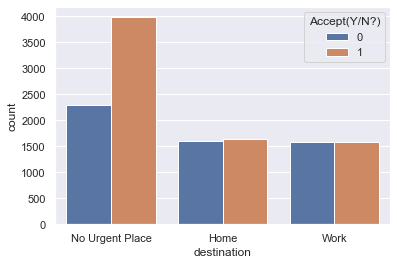

In [39]:
a = pd.DataFrame(data.groupby('destination')['Accept(Y/N?)'].count())
a['accepted'] = data[data['Accept(Y/N?)'] == 1].groupby('destination')['Accept(Y/N?)'].count()
a['rejected'] = data[data['Accept(Y/N?)'] == 0].groupby('destination')['Accept(Y/N?)'].count()
a['% Accepted'] = ((a['accepted']) / (a['Accept(Y/N?)']))*100
a['% Rejected'] = ((a['rejected']) / (a['Accept(Y/N?)']))*100
print(a)

sns.countplot(x = 'destination' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

We can observe that there is a high acceptance rate from people who have no urgent place to go with 63% 

People who are either on the way to home or Work have almost similar acceptance and rejection rates

In [40]:
def grouping(col):
    a = pd.DataFrame(data.groupby(col)['Accept(Y/N?)'].count())
    a['accepted'] = data[data['Accept(Y/N?)'] == 1].groupby(col)['Accept(Y/N?)'].count()
    a['rejected'] = data[data['Accept(Y/N?)'] == 0].groupby(col)['Accept(Y/N?)'].count()
    a['% Accepted'] = ((a['accepted']) / (a['Accept(Y/N?)']))*100
    a['% Rejected'] = ((a['rejected']) / (a['Accept(Y/N?)']))*100
    return a 
    

In [41]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [42]:
grouping('passanger')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
passanger,,,,,
Alone,7305,3841,3464,52.580424,47.419576
Friend(s),3298,2221,1077,67.343845,32.656155
Kid(s),1006,508,498,50.497018,49.502982
Partner,1075,640,435,59.534884,40.465116


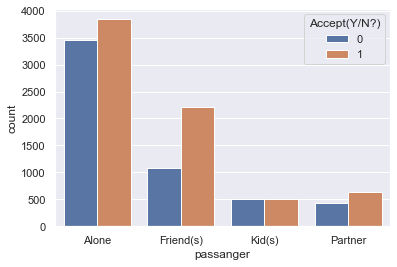

In [43]:
sns.countplot(x = 'passanger' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

Most of the passanger's are travelling alone 

But passangers with friends have high coupon acceptance chances with percentage of 67.3 and then passangers with partners also
have coupon high acceptance range when compared to passangers travelling alone or with kids 

In [44]:
grouping('weather')


,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
weather,,,,,
Rainy,1210,560,650,46.280992,53.719008
Snowy,1405,661,744,47.046263,52.953737
Sunny,10069,5989,4080,59.479591,40.520409


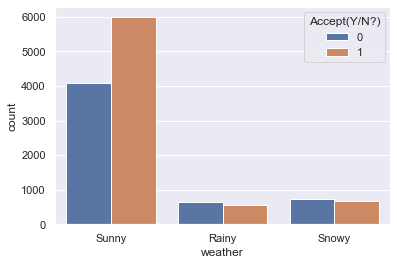

In [45]:
sns.countplot(x = 'weather' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

Most customers are travelling in a sunny day and coupon accepting chances are also high when compared
to other weather conditions 

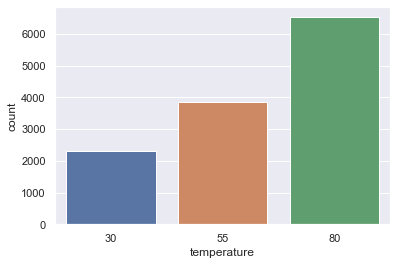

In [46]:
sns.countplot(x = 'temperature' , data = data)
plt.show()

Temperature is given in Farenheit and 80 F is a normal not so hot temperature where as 55 F is cold weather and 30 F is extreme cold 

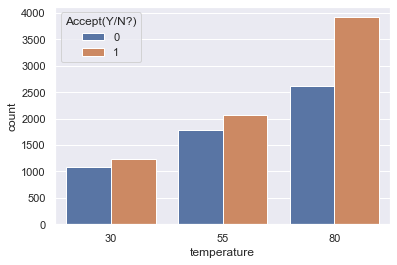

In [47]:
sns.countplot(x = 'temperature' , data = data , hue = 'Accept(Y/N?)' )
plt.show()

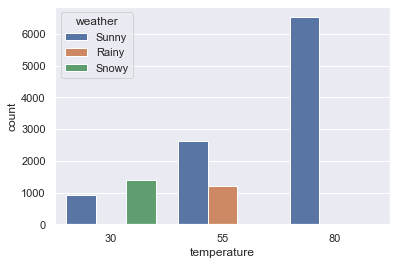

In [48]:

sns.countplot(x = 'temperature' , data = data , hue = 'weather')
plt.show()

In [49]:
grouping('temperature')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
temperature,,,,,
30,2316,1230,1086,53.108808,46.891192
55,3840,2061,1779,53.671875,46.328125
80,6528,3919,2609,60.033701,39.966299


We can observe that most customers are driving at a temperature of 80F and their coupon acceptance possibility 
is high when compared to other temperature conditions 

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


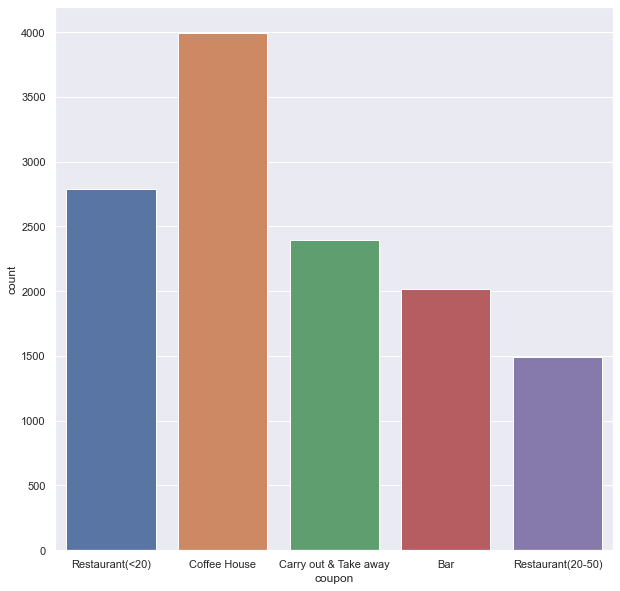

In [50]:
print(data['coupon'].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(x = 'coupon' , data = data)
plt.show()

We can see that most given coupons are for Coffee house and then Restaurant where average spend is less than 20 $

In [51]:
grouping('coupon')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
coupon,,,,,
Bar,2017,827,1190,41.001487,58.998513
Carry out & Take away,2393,1760,633,73.547848,26.452152
Coffee House,3996,1995,2001,49.924925,50.075075
Restaurant(20-50),1492,658,834,44.101877,55.898123
Restaurant(<20),2786,1970,816,70.710696,29.289304


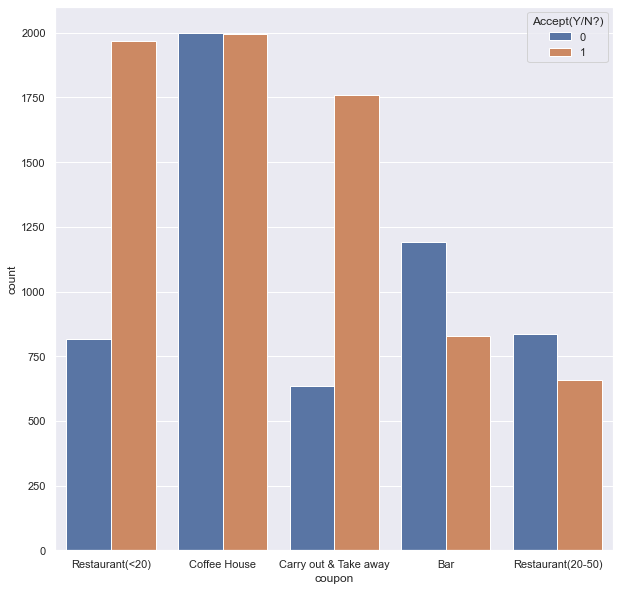

In [52]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'coupon' , data = data , hue = 'Accept(Y/N?)')
plt.show()

Most type of coupons given are Coffe House and Restaurant(<20) where as most accepted type coupon from customer is 
Carryout and Takeaway with 73 % acceptance and second to that is coupons for restuarant (<20) with 70% acceptance

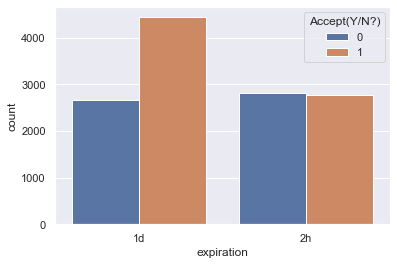

In [53]:
sns.countplot(x = 'expiration' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [54]:
grouping('expiration')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
expiration,,,,,
1d,7091,4436,2655,62.558172,37.441828
2h,5593,2774,2819,49.597711,50.402289


Coupons that are having expiration in a single day are given more frequent and also accepted by most customers(62 %)

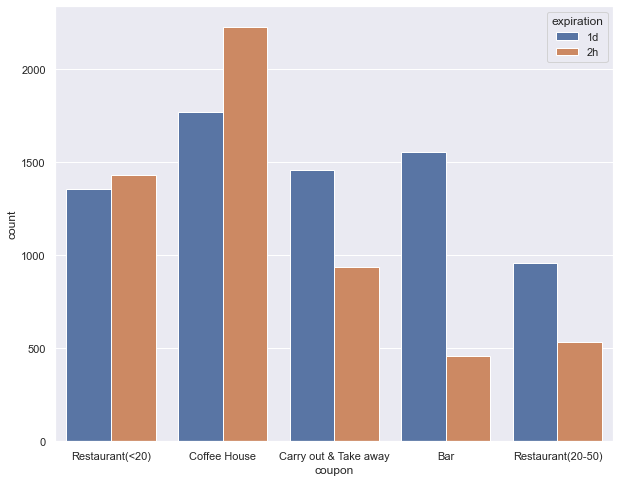

In [55]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'coupon' , data = data , hue = 'expiration')
plt.show()

In [56]:
pd.DataFrame(data.groupby('coupon')['expiration'].value_counts())

expiration
coupon                expiration            
Bar                   1d                1556
                      2h                 461
Carry out & Take away 1d                1456
                      2h                 937
Coffee House          2h                2227
                      1d                1769
Restaurant(20-50)     1d                 956
                      2h                 536
Restaurant(<20)       2h                1432
                      1d                1354

Female    6511
Male      6173
Name: gender, dtype: int64


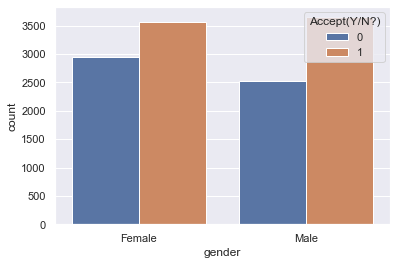

In [57]:
print(data['gender'].value_counts())
sns.countplot( x = 'gender' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [58]:
grouping('gender')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
gender,,,,,
Female,6511,3563,2948,54.722777,45.277223
Male,6173,3647,2526,59.079864,40.920136


We can observe there is no much difference in coupon acceptance based on gender attribute 

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64


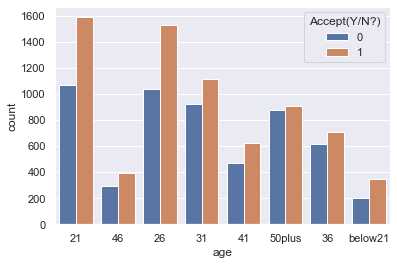

In [59]:
print(data['age'].value_counts())
sns.countplot( x = 'age' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [60]:
grouping('age')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
age,,,,,
21,2653,1587,1066,59.819073,40.180927
26,2559,1525,1034,59.593591,40.406409
31,2039,1114,925,54.634625,45.365375
36,1319,706,613,53.525398,46.474602
41,1093,626,467,57.273559,42.726441
46,686,395,291,57.580175,42.419825
50plus,1788,910,878,50.894855,49.105145
below21,547,347,200,63.436929,36.563071


Majority of customers fall under the age limit of 21-26 ,
But most coupons are accepted by customers below 21 of age(63%) and almsot same acceptance value for age group 21-26(59%)

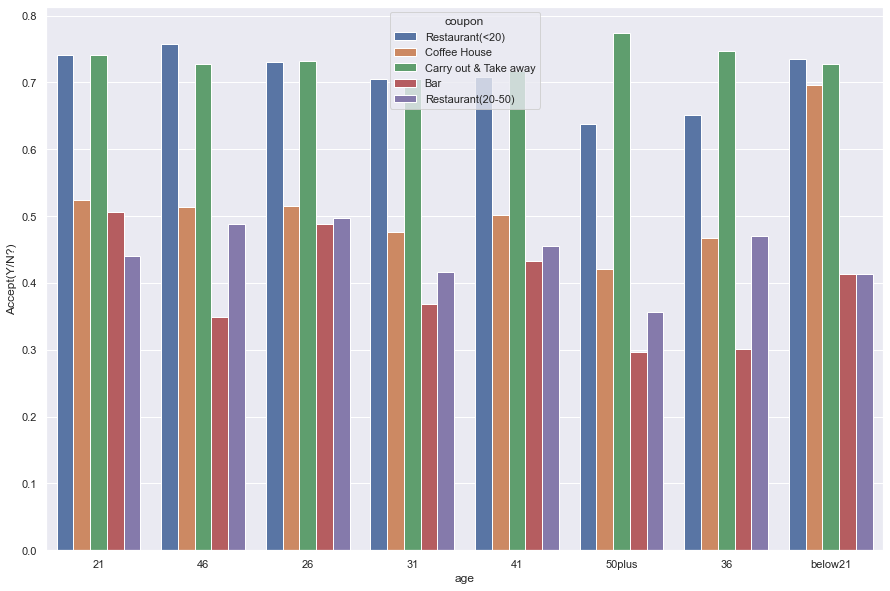

In [61]:
plt.figure(figsize = (15 , 10))
sns.barplot( x = 'age' , y ='Accept(Y/N?)', hue ='coupon', data = data , ci = None)
plt.show()

* We can observe that 
* Age group below 21 and 21 years have more coupon acceptance percentage 
* Almost all age group are accepting coupons of Take away or restaurant(<20 k )
* Coffehouse coupon is mostly accepted amongst age group below 21 
* Bar coupons are mostly accepted by customers of age group 21-26
* Bar coupons are least accepted by customer from old age group (50 Plus)

In [62]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64


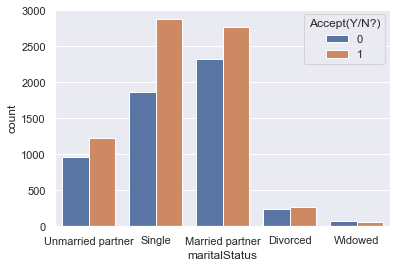

In [63]:
print(data['maritalStatus'].value_counts())
sns.countplot( x = 'maritalStatus' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [64]:
grouping('maritalStatus')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
maritalStatus,,,,,
Divorced,516,273,243,52.906977,47.093023
Married partner,5100,2769,2331,54.294118,45.705882
Single,4752,2879,1873,60.585017,39.414983
Unmarried partner,2186,1227,959,56.129918,43.870082
Widowed,130,62,68,47.692308,52.307692


Coupon acceptance is high amongst customers who are single and also customer with un married partner 

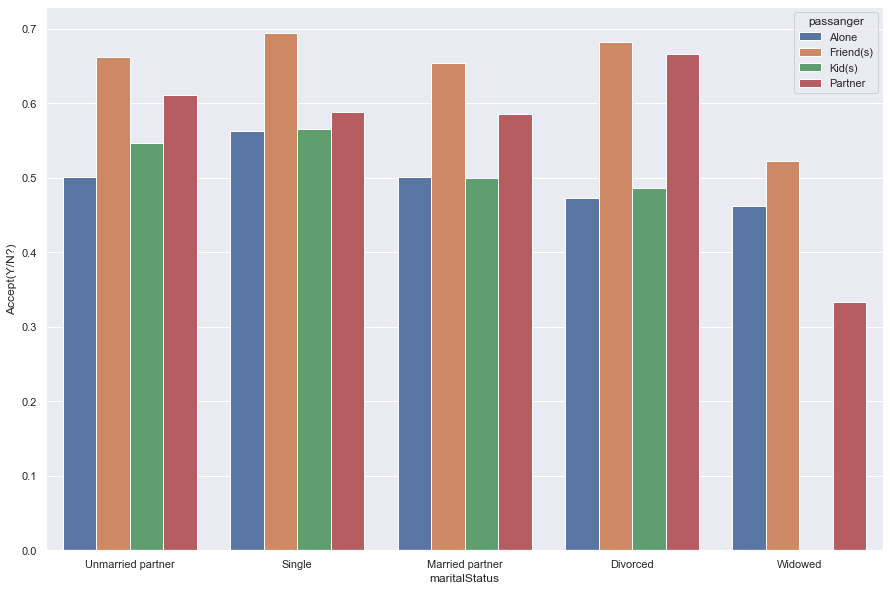

In [65]:
plt.figure(figsize = (15 , 10))
sns.barplot( x = 'maritalStatus' , y ='Accept(Y/N?)', hue ='passanger', data = data , ci = None)
plt.show()

0    7431
1    5253
Name: has_children, dtype: int64


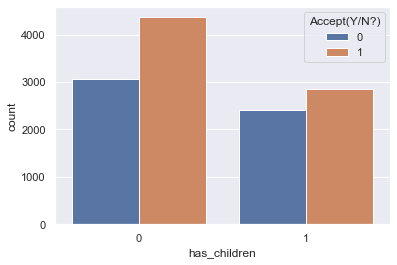

In [66]:
print(data['has_children'].value_counts())
sns.countplot( x = 'has_children' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [67]:
grouping('has_children')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
has_children,,,,,
0,7431,4365,3066,58.740412,41.259588
1,5253,2845,2408,54.159528,45.840472


We can observe that there is only a little difference in accpetance rate for passengers with children an without children

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64


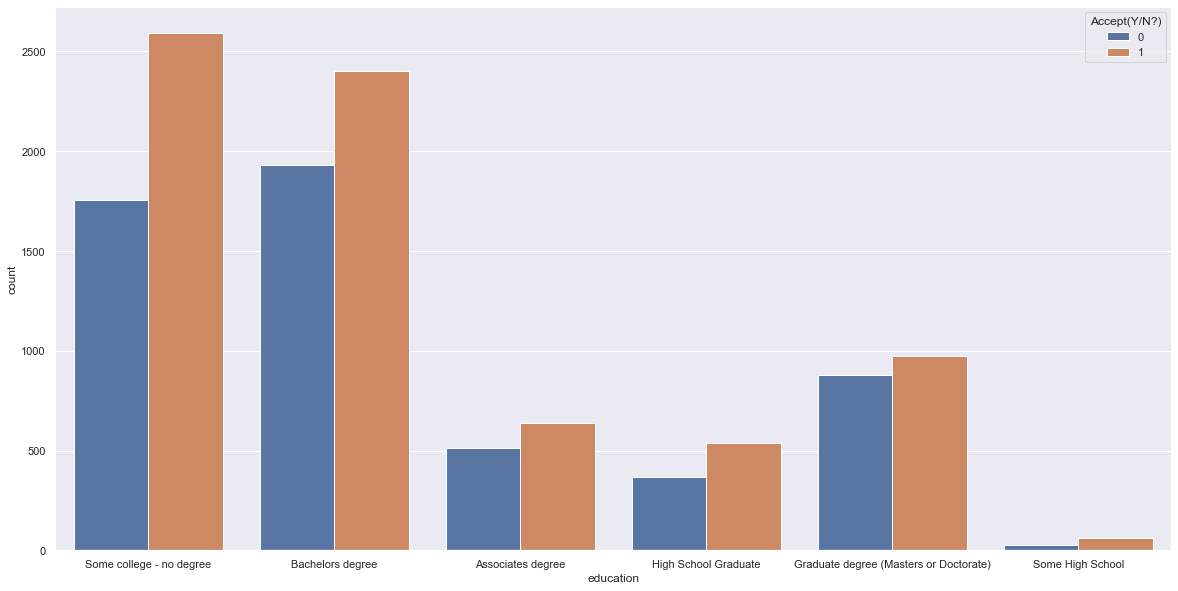

In [68]:
print(data['education'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'education' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [69]:
grouping('education')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
education,,,,,
Associates degree,1153,638,515,55.333912,44.666088
Bachelors degree,4335,2403,1932,55.432526,44.567474
Graduate degree (Masters or Doctorate),1852,975,877,52.645788,47.354212
High School Graduate,905,536,369,59.226519,40.773481
Some High School,88,63,25,71.590909,28.409091
Some college - no degree,4351,2595,1756,59.641462,40.358538


* Most of the customers have finished degree
* high acceptance is more amongst high school 
* All other educational background have similar acceptance and rejected rates 

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


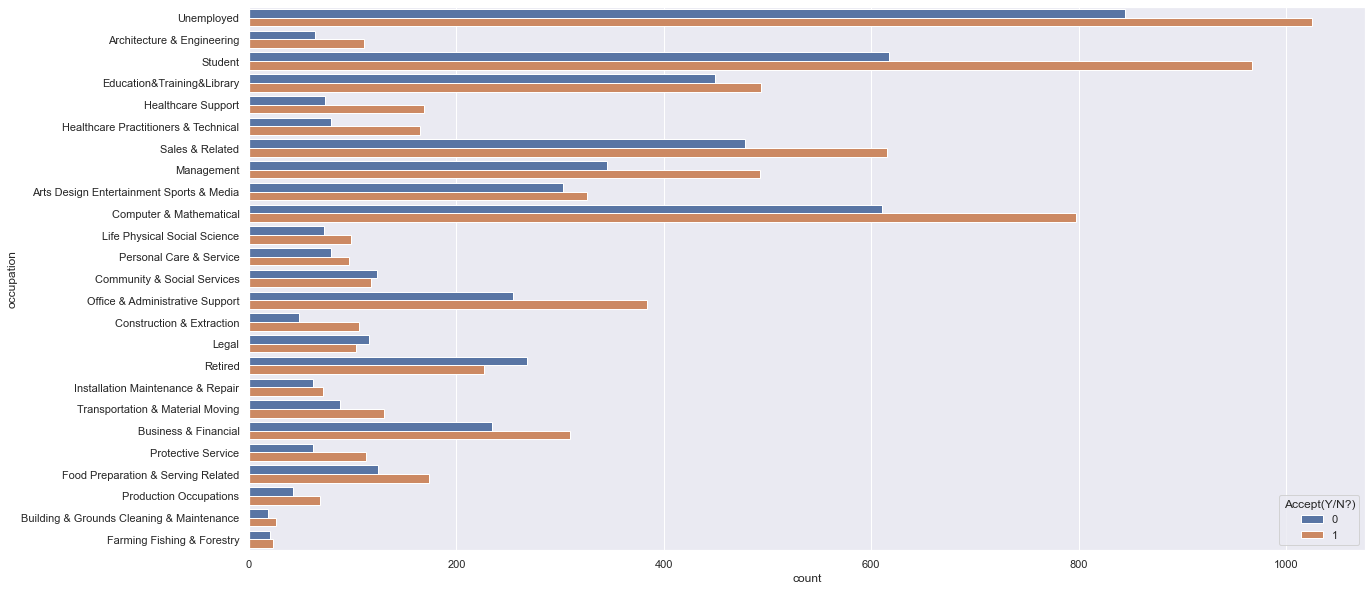

In [70]:
pd.set_option('display.max_rows' , 25)
print(data['occupation'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( y = 'occupation' , data = data , hue = 'Accept(Y/N?)' , orient='h')
plt.show()

In [71]:
grouping('occupation')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
occupation,,,,,
Architecture & Engineering,175,111,64,63.428571,36.571429
Arts Design Entertainment Sports & Media,629,326,303,51.828299,48.171701
Building & Grounds Cleaning & Maintenance,44,26,18,59.090909,40.909091
Business & Financial,544,310,234,56.985294,43.014706
Community & Social Services,241,118,123,48.962656,51.037344
Computer & Mathematical,1408,798,610,56.676136,43.323864
Construction & Extraction,154,106,48,68.831169,31.168831
Education&Training&Library,943,494,449,52.386002,47.613998
Farming Fishing & Forestry,43,23,20,53.488372,46.511628


* Most customers are unemployed 
* Coupon acceptance is fairly high amongst the customers from Healthcare support 
* Most number of coupons are accepted by unemployed category customers 

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64


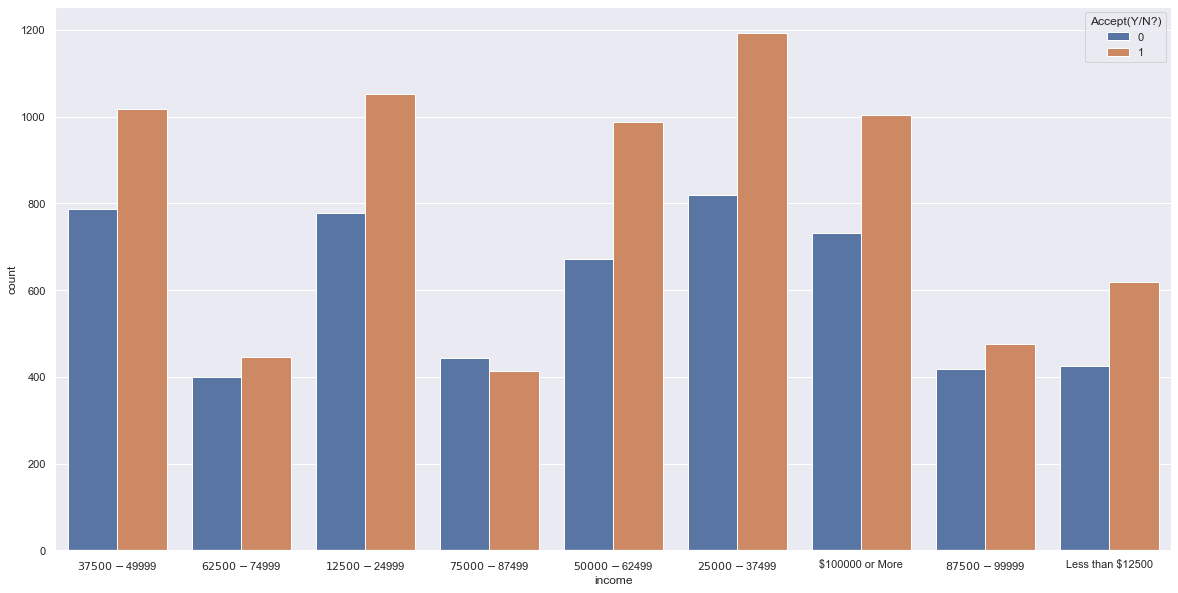

In [72]:
print(data['income'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'income' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [73]:
grouping('income')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
income,,,,,
$100000 or More,1736,1004,732,57.834101,42.165899
$12500 - $24999,1831,1052,779,57.454943,42.545057
$25000 - $37499,2013,1194,819,59.314456,40.685544
$37500 - $49999,1805,1018,787,56.398892,43.601108
$50000 - $62499,1659,988,671,59.553948,40.446052
$62500 - $74999,846,446,400,52.718676,47.281324
$75000 - $87499,857,414,443,48.308051,51.691949
$87500 - $99999,895,476,419,53.184358,46.815642
Less than $12500,1042,618,424,59.309021,40.690979


* Most of the customers have income in the range $25000 - $37499
* Customers in this range have most accepted coupons 
* These customers are more liekly to accept coupons with a acceptance percentage of 59%
* Customers beyond 75000 income have fair rejection rates on coupon

never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64


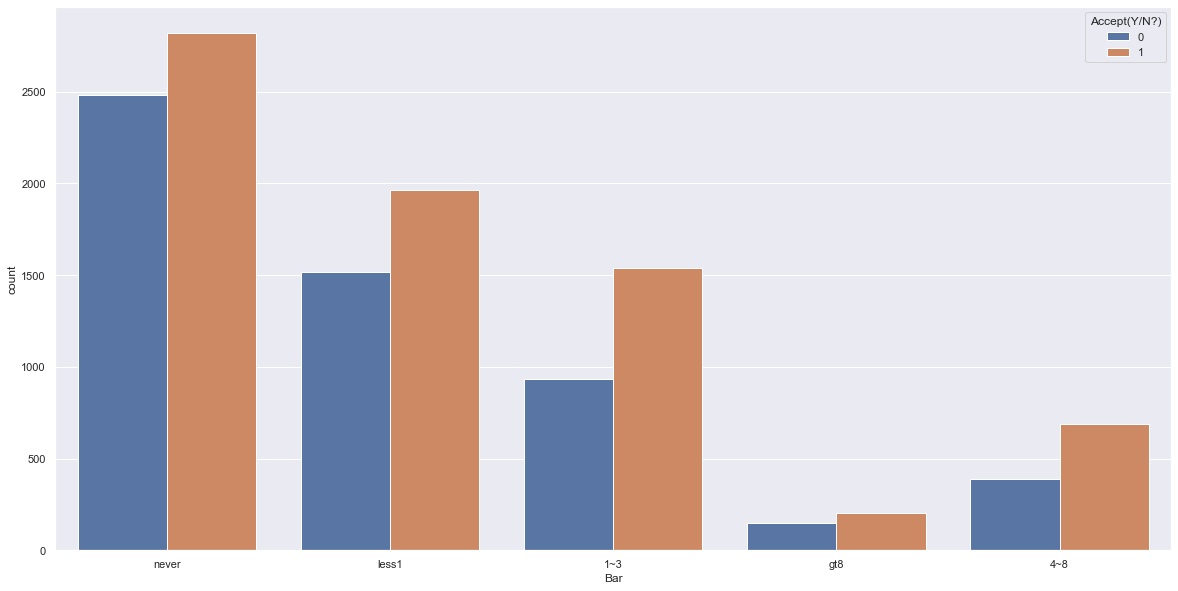

In [74]:
print(data['Bar'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Bar' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [75]:
grouping('Bar')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
Bar,,,,,
1~3,2473,1538,935,62.191670,37.808330
4~8,1076,686,390,63.754647,36.245353
gt8,349,201,148,57.593123,42.406877
less1,3482,1963,1519,56.375646,43.624354
never,5304,2822,2482,53.205128,46.794872


* Most customers have never visited Bar 
* Customers visiting bar 1 to 3 times or 4 to 8 times per month have more coupon acceptance rates

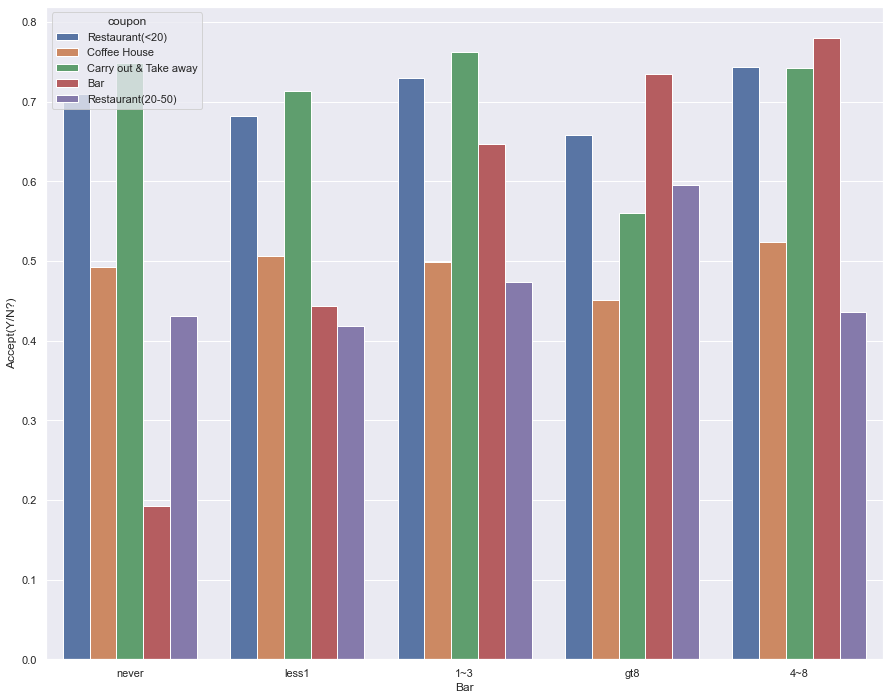

In [76]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'Bar' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , ci = None)
plt.show()

* Users who go to bar 4-8 times or more than 8 times are accepting more bar coupons 
* People who have never visited bar are accepting coupons for coffee House and restaurant 

less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64


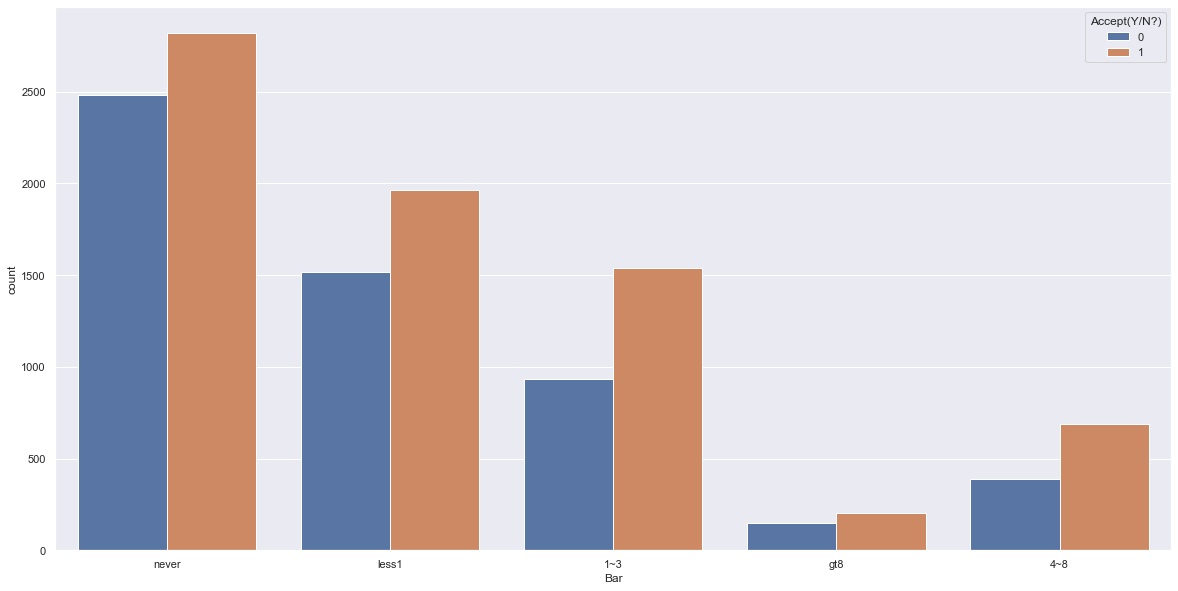

In [77]:
print(data['CoffeeHouse'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Bar' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [78]:
grouping('CoffeeHouse')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
CoffeeHouse,,,,,
1~3,3225,2109,1116,65.395349,34.604651
4~8,1784,1130,654,63.340807,36.659193
gt8,1111,648,463,58.325833,41.674167
less1,3602,1961,1641,54.441977,45.558023
never,2962,1362,1600,45.982444,54.017556


* MOst cutomers have  visited coffee House 1-3 times
* Customers who have never visited coffee House or have visited less than 1 time every month have more chances of accepting the coupons

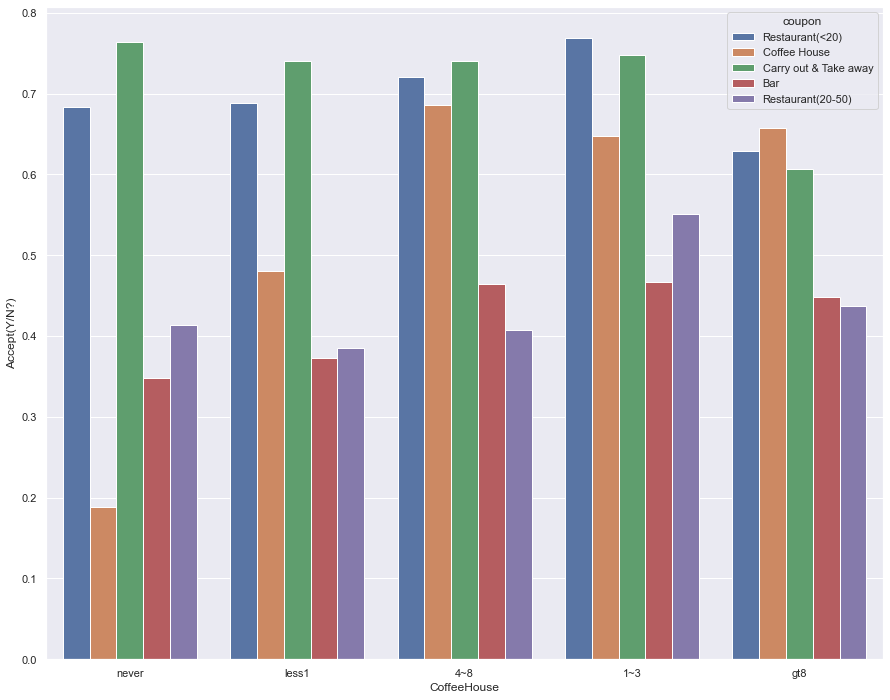

In [79]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'CoffeeHouse' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , ci = None)
plt.show()

* Customers who have visited coffee house 4-8 or greater than 8 times have more coupons of Coffee House 
* Mostly customers are accepting Carry out and take away coupons than any other coupon type 

1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64


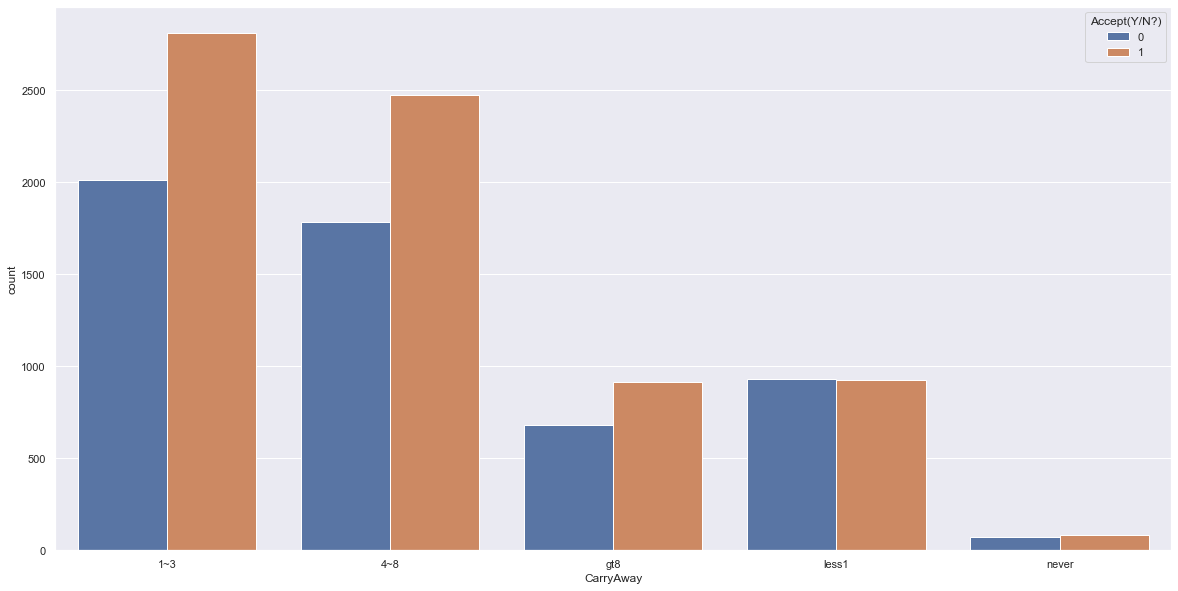

In [80]:
print(data['CarryAway'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'CarryAway' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [81]:
grouping('CarryAway')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
CarryAway,,,,,
1~3,4823,2813,2010,58.324694,41.675306
4~8,4258,2474,1784,58.102395,41.897605
gt8,1594,914,680,57.340025,42.659975
less1,1856,927,929,49.946121,50.053879
never,153,82,71,53.594771,46.405229


* Most customers at least take way food 1-3 times
* Customers who take away food 1-3 or 4 -8 times every month have similar coupon acceptance rates

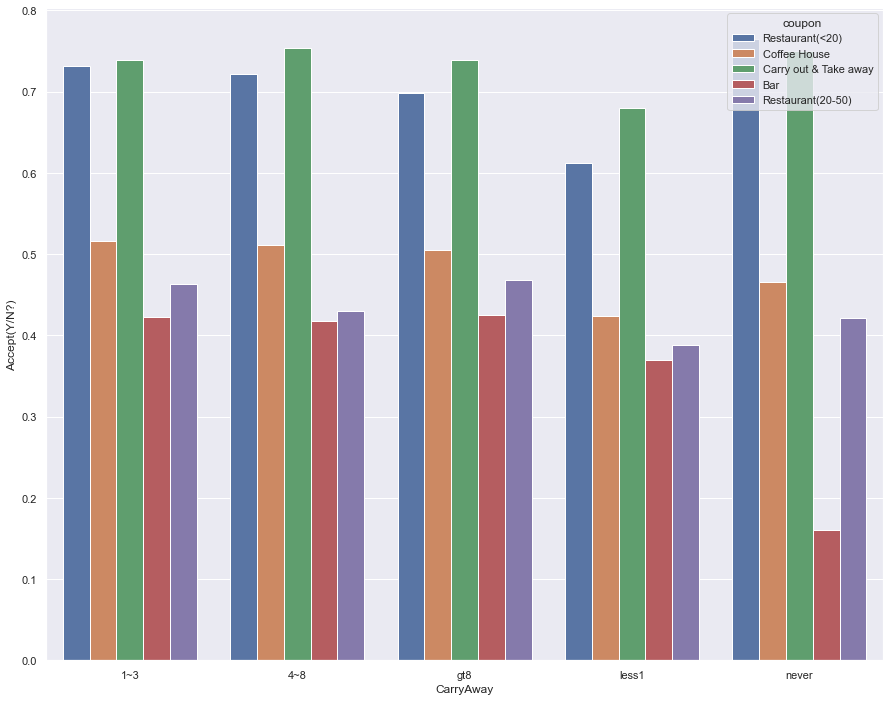

In [82]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'CarryAway' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , ci = None)
plt.show()

* From above plot we can observe that customers who have never took carry away have the highest acceptance of coupon for restaurant and take away 
* We can also see that most customers prefer restaurant or carry out / take away type coupons

1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64


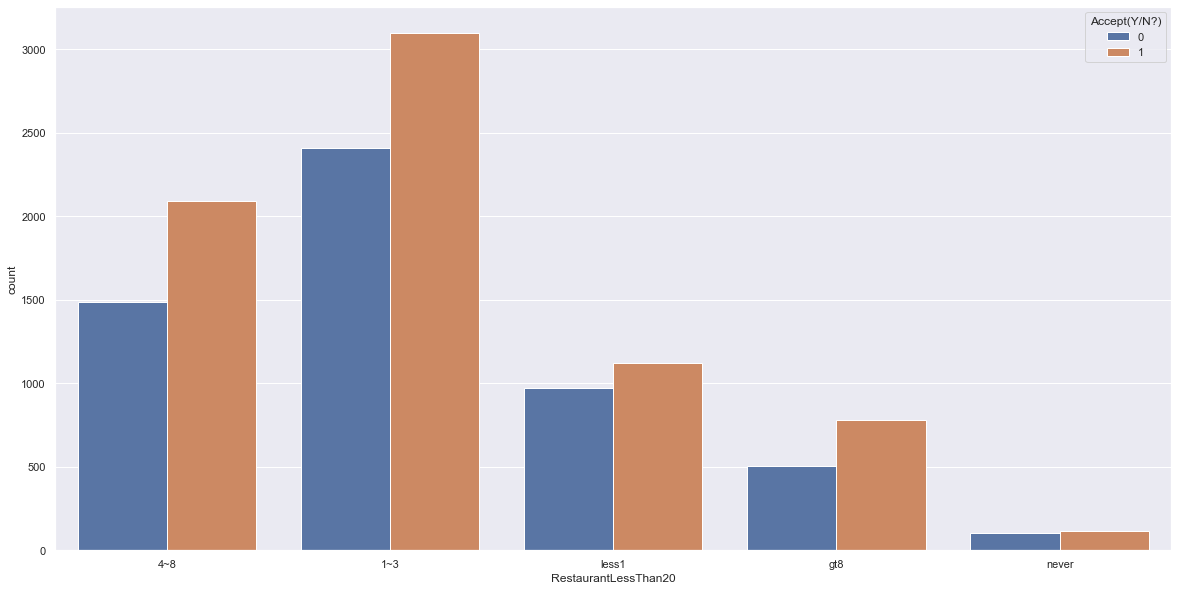

In [83]:
# 'RestaurantLessThan20'
print(data['RestaurantLessThan20'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'RestaurantLessThan20' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [84]:
grouping('RestaurantLessThan20')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
RestaurantLessThan20,,,,,
1~3,5506,3099,2407,56.284054,43.715946
4~8,3580,2093,1487,58.463687,41.536313
gt8,1285,781,504,60.778210,39.221790
less1,2093,1119,974,53.463927,46.536073
never,220,118,102,53.636364,46.363636


* Most user have visisted Restaurant at least 1-3 times where average spend is < 20 $
* But coupon acceptance rate is more amongst people who have visited restaurant more than 8 time 

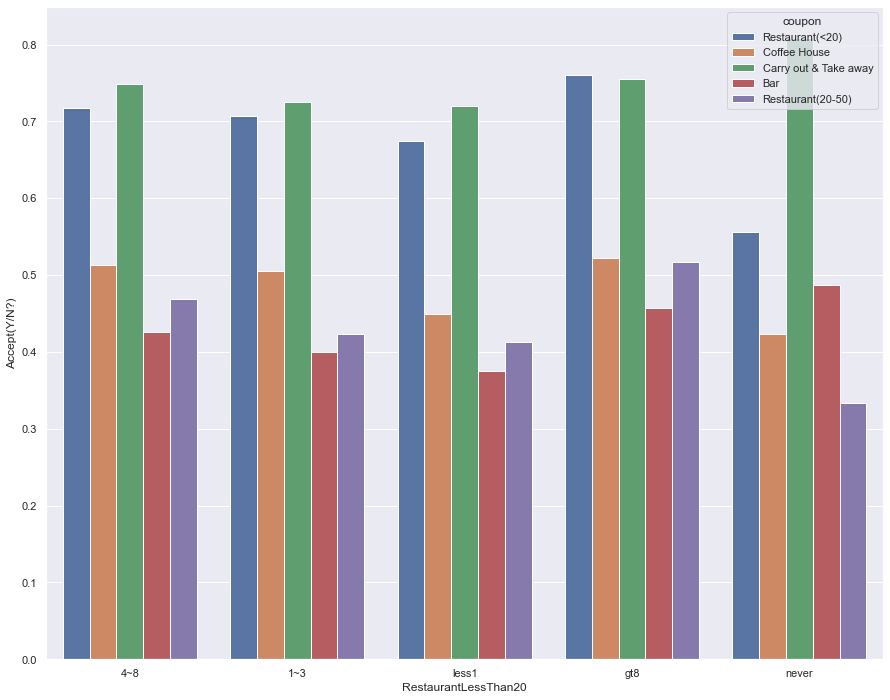

In [85]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'RestaurantLessThan20' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , ci = None)
plt.show()

* We can observe that whether the customer has visited the reaturant has not does not affect whethe a user will accept coupon
* Here people who have never visited restaurant have higher acceptance for carry out and take away type coupons

less1    6266
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64


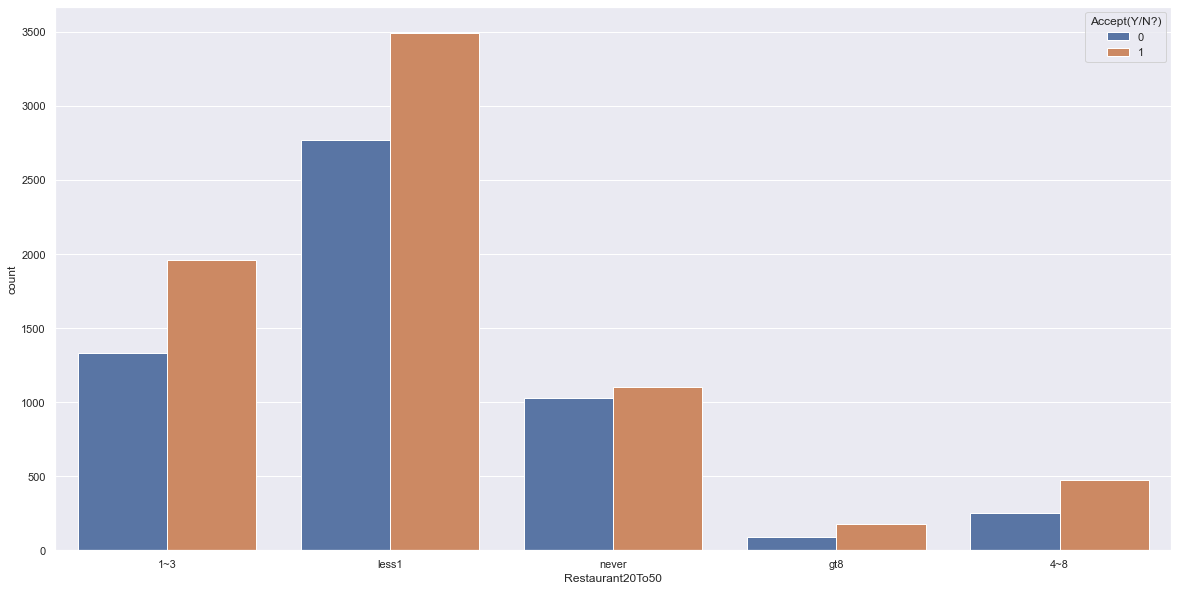

In [86]:
# Restaurant20To50
print(data['Restaurant20To50'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Restaurant20To50' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [87]:
grouping('Restaurant20To50')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
Restaurant20To50,,,,,
1~3,3290,1958,1332,59.513678,40.486322
4~8,728,477,251,65.521978,34.478022
gt8,264,175,89,66.287879,33.712121
less1,6266,3495,2771,55.777210,44.222790
never,2136,1105,1031,51.732210,48.267790


* Most customers have visited less than 1 every month to a restaurant where average spend is 20-50$
* Customers who visit expensive restaurant more than 8 times have higher acceptance ratio

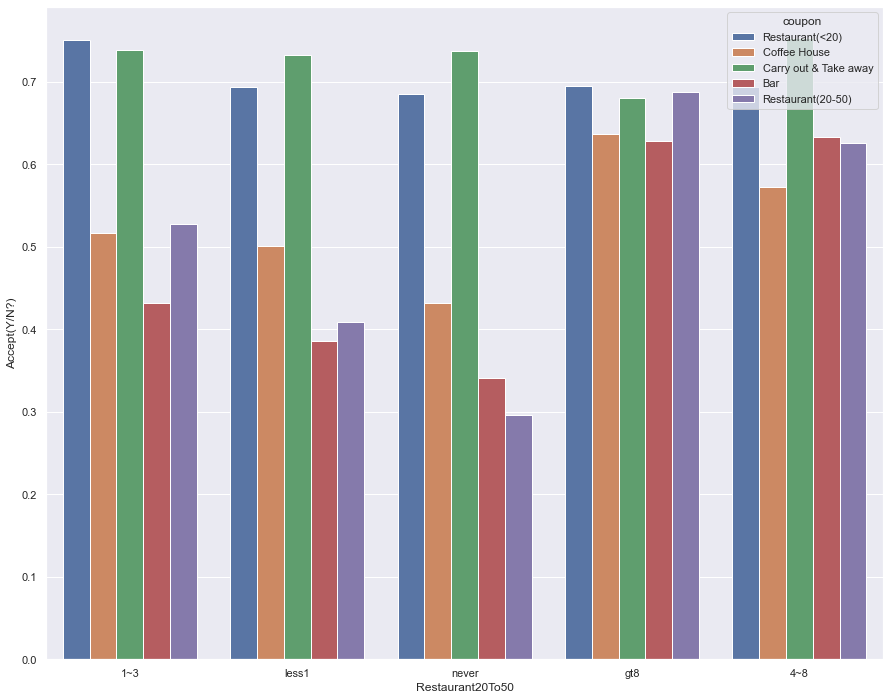

In [88]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'Restaurant20To50' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , ci = None)
plt.show()

* Customers who have already visited expensive restaurant have more restaurant type coupons 
* Customers who have never visited this expensive reataurant have less acceptance of the coupon
* All customers mostly accept Carry away type coupons 

In [89]:
data['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [90]:
data['toCoupon_GEQ15min'].value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

In [91]:
data['toCoupon_GEQ25min'].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

In [92]:
# We Since all the data points tell drives are more then 5 Min, We shall categorise driving distance of restaurant / coffee barr
# based on drive time 

In [93]:
data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [94]:
data.shape

(12684, 24)

In [95]:
data_1 = data.copy()

In [96]:
data_1.shape

(12684, 24)

In [97]:
drive_time = []
for i in range(data_1.shape[0]) :
    if (data_1['toCoupon_GEQ15min'][i]) == 0 :
        drive_time.append('Less than 15 mins')
    elif ((data_1['toCoupon_GEQ15min'][i]) == 1 ) and ((data_1['toCoupon_GEQ25min'][i]) == 0) :
        drive_time.append('15 to 25 mins')
    else :
        drive_time.append('More than 25 mins')

In [98]:
data_1['drive_time'] = drive_time

In [99]:
data_1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),drive_time
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,0,0,0,1,1,Less than 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,0,0,0,1,0,Less than 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins


15 to 25 mins        5611
Less than 15 mins    5562
More than 25 mins    1511
Name: drive_time, dtype: int64


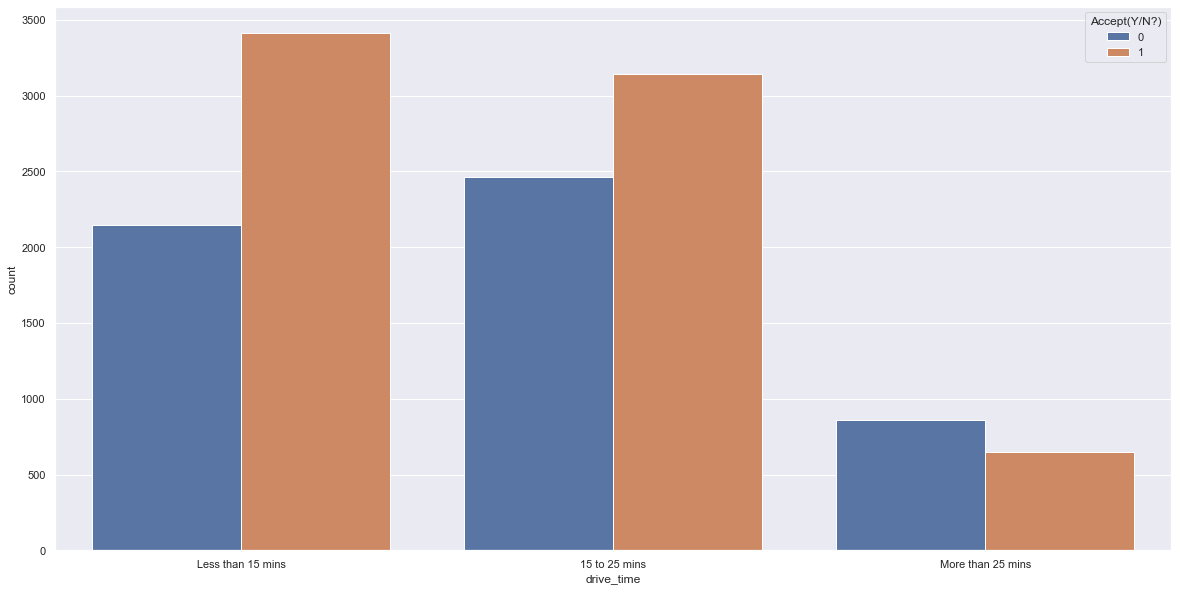

In [100]:
print(data_1['drive_time'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'drive_time' , data = data_1 , hue = 'Accept(Y/N?)')
plt.show()

* Most of the coupons issued are with driving distance less than 15 mins 

In [101]:
b = pd.DataFrame(data_1.groupby('drive_time')['Accept(Y/N?)'].count())
b['accepted'] = data_1[data_1['Accept(Y/N?)'] == 1].groupby('drive_time')['Accept(Y/N?)'].count()
b['rejected'] = data_1[data_1['Accept(Y/N?)'] == 0].groupby('drive_time')['Accept(Y/N?)'].count()
b['% Accepted'] = ((b['accepted']) / (b['Accept(Y/N?)']))*100
b['% Rejected'] = ((b['rejected']) / (b['Accept(Y/N?)']))*100
b

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
drive_time,,,,,
15 to 25 mins,5611,3146,2465,56.068437,43.931563
Less than 15 mins,5562,3416,2146,61.416757,38.583243
More than 25 mins,1511,648,863,42.885506,57.114494


* We can observe coupon acceptance rate is also more where the drive for using the couposn is less than 15 mins

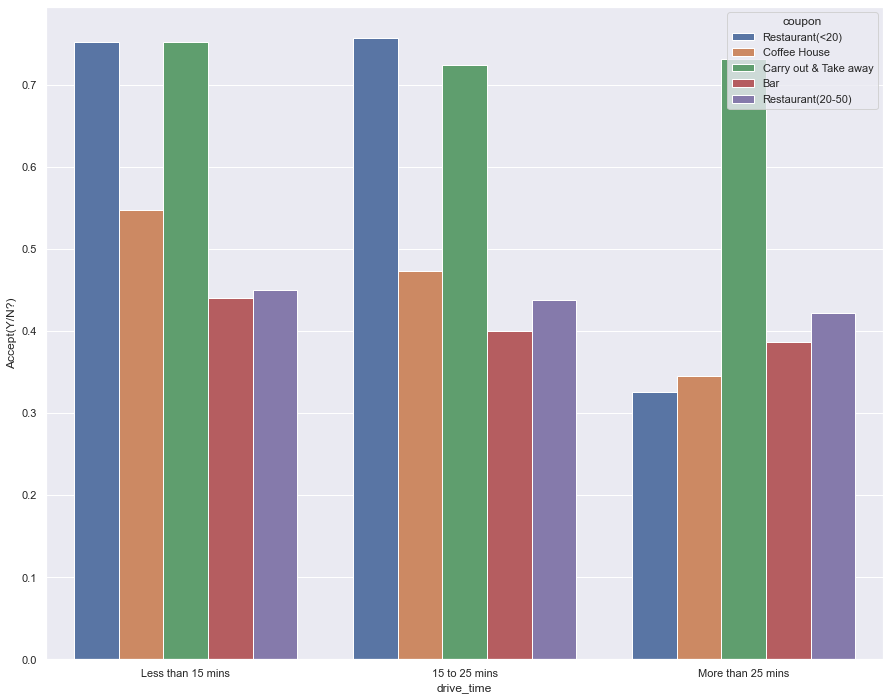

In [102]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'drive_time' , y = 'Accept(Y/N?)' , data = data_1 , hue = 'coupon' , ci = None)
plt.show()

* Most coupon type within 15 min drive are restaurant type coupons

In [103]:
data_1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),drive_time
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,0,0,0,1,1,Less than 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,0,0,0,1,0,Less than 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins


In [104]:
# Now we can drop toCoupon_GEQ5min , toCoupon_GEQ15min , toCoupon_GEQ25min since we have created a new variable drive_time
data_1.shape

(12684, 25)

In [105]:
data_1 = data_1.drop(['toCoupon_GEQ5min' , 'toCoupon_GEQ15min' , 'toCoupon_GEQ25min'] , axis = 1)
data_1.shape

(12684, 22)

In [106]:
data_1.rename(columns = {'Accept(Y/N?)'  : 'Accept'} , inplace = True)
data_1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Accept,drive_time
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,Less than 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,Less than 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,15 to 25 mins


In [107]:
# Checking significance for Feature Occupation through Anova test


import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Accept ~ occupation' , data = data_1).fit()
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

                 sum_sq       df         F        PR(>F)
occupation    29.411863     24.0  5.033285  8.472695e-15
Residual    3082.188579  12659.0       NaN           NaN


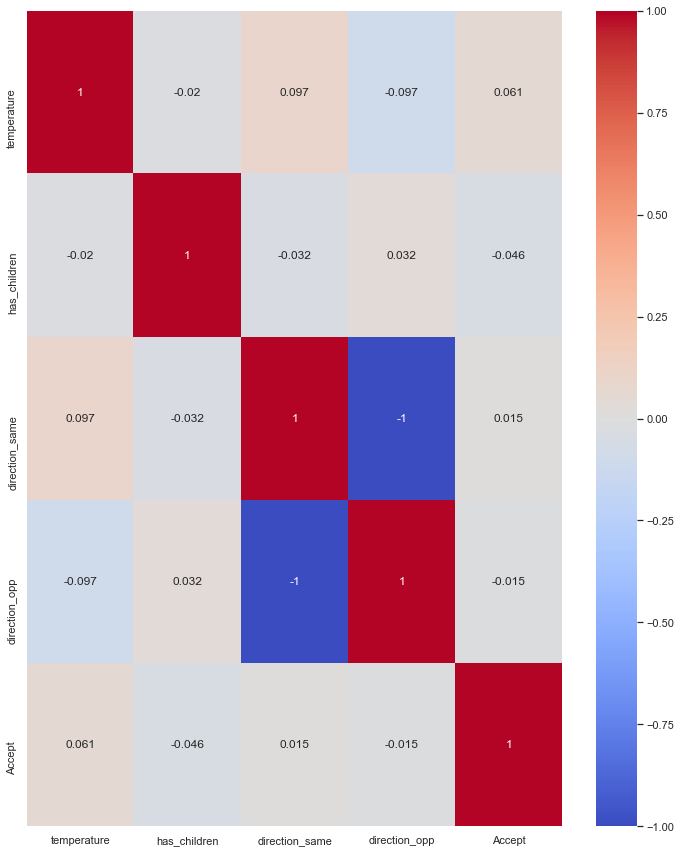

In [108]:
plt.figure(figsize = (12,15))
corr = data_1.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.show()

In [109]:
corr

,temperature,has_children,direction_same,direction_opp,Accept
temperature,1.000000,-0.019716,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,-0.031620,0.031620,-0.045557
direction_same,0.097085,-0.031620,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,-1.000000,1.000000,-0.014570
Accept,0.061240,-0.045557,0.014570,-0.014570,1.000000


We observe there is a perfect negative corelation between direction_same and direction_opposite with corelation value -1 , 
Hence 1 variable shall be removed 

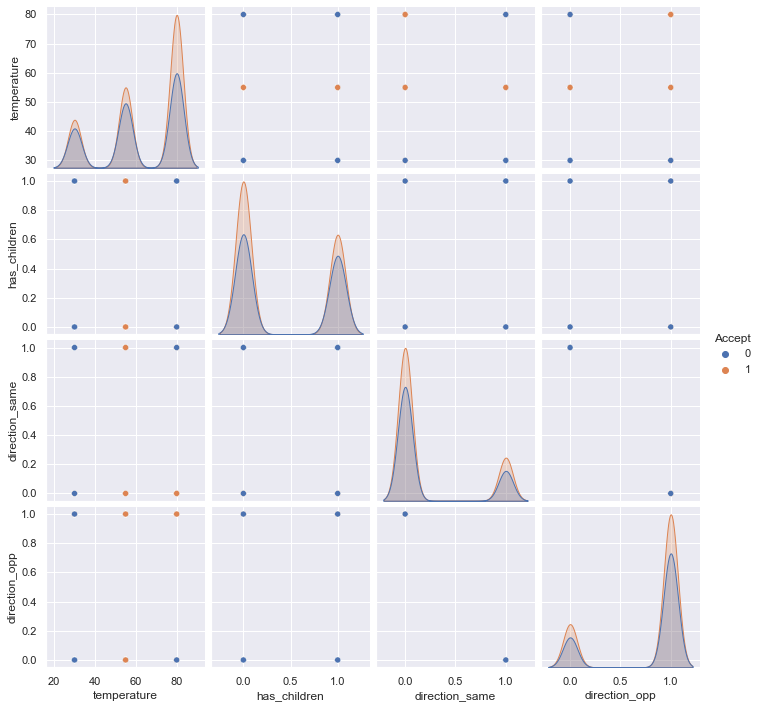

In [183]:
sns.pairplot(data = data_1 , hue = 'Accept')
plt.show()

In [110]:
grouping('has_children')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
has_children,,,,,
0,7431,4365,3066,58.740412,41.259588
1,5253,2845,2408,54.159528,45.840472


* We can see that there is no much difference in acceptance rates whether the customer has children or not
* Heatmap also tells that there is no strong relation between the variable , corr coeff -0.045557 tells that it has almost not relation with the acceptance of coupon

In [111]:
grouping('direction_same')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
direction_same,,,,,
0,9960,5624,4336,56.465863,43.534137
1,2724,1586,1138,58.223201,41.776799


* We can see that there is no much difference in acceptance rates whether the customer has children or not
* Heatmap also tells that there is no strong relation between the variable , corr coeff 0.014570 tells that it has almost not relation with the acceptance of coupon

Hence removing variables ('has_children' ,'direction_same' , 'direction_opp' )

In [112]:
data_2 = data_1.copy()

In [113]:
data_2.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Accept,drive_time
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,Less than 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,Less than 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,15 to 25 mins


In [114]:
data_2 = data_2.drop(['has_children' ,'direction_same' , 'direction_opp'] , axis =1)
data_2.shape

(12684, 19)

In [115]:
data_2['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [116]:
for i in data_1.select_dtypes(include = 'object').columns:
    print(i)

destination
passanger
weather
coupon
expiration
gender
age
maritalStatus
education
occupation
income
Bar
CoffeeHouse
CarryAway
RestaurantLessThan20
Restaurant20To50
drive_time


In [117]:
data_2 = pd.get_dummies(data_2 , columns = ['destination' ,'passanger', 'weather','coupon','expiration','gender',
                                            'age','maritalStatus','education','occupation','income','Bar',
                                            'CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','drive_time'])
data_2.shape

(12684, 102)

In [118]:
# Dummy Variables 

data_2.columns.tolist()

['temperature',
 'Accept',
 'destination_Home',
 'destination_No Urgent Place',
 'destination_Work',
 'passanger_Alone',
 'passanger_Friend(s)',
 'passanger_Kid(s)',
 'passanger_Partner',
 'weather_Rainy',
 'weather_Snowy',
 'weather_Sunny',
 'coupon_Bar',
 'coupon_Carry out & Take away',
 'coupon_Coffee House',
 'coupon_Restaurant(20-50)',
 'coupon_Restaurant(<20)',
 'expiration_1d',
 'expiration_2h',
 'gender_Female',
 'gender_Male',
 'age_21',
 'age_26',
 'age_31',
 'age_36',
 'age_41',
 'age_46',
 'age_50plus',
 'age_below21',
 'maritalStatus_Divorced',
 'maritalStatus_Married partner',
 'maritalStatus_Single',
 'maritalStatus_Unmarried partner',
 'maritalStatus_Widowed',
 'education_Associates degree',
 'education_Bachelors degree',
 'education_Graduate degree (Masters or Doctorate)',
 'education_High School Graduate',
 'education_Some High School',
 'education_Some college - no degree',
 'occupation_Architecture & Engineering',
 'occupation_Arts Design Entertainment Sports & Medi

In [119]:
data_2.shape

(12684, 102)

In [120]:
data_2 = data_2.drop(['destination_Work','passanger_Partner','weather_Sunny','coupon_Restaurant(<20)','expiration_1d','age_below21','gender_Female',
'maritalStatus_Widowed', 'education_Some college - no degree','occupation_Unemployed','income_Less than $12500','Bar_never',
'CoffeeHouse_never','CarryAway_never','RestaurantLessThan20_never','Restaurant20To50_never','drive_time_More than 25 mins'],axis =1)

data_2.shape

(12684, 85)

In [121]:
# SPLITTING INTO X AND Y 

x = data_2.drop(['Accept'] , axis = 1)
y = data_2[['Accept']]

In [122]:
x.head()

,temperature,destination_Home,destination_No Urgent Place,passanger_Alone,passanger_Friend(s),passanger_Kid(s),weather_Rainy,weather_Snowy,coupon_Bar,coupon_Carry out & Take away,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,drive_time_15 to 25 mins,drive_time_Less than 15 mins
0,55,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,80,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,80,0,1,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,80,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,80,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [123]:
y.head()

,Accept
0,1
1,0
2,1
3,0
4,0


# Feature Scaling 

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-0.43342979, -0.58536182,  1.00934674, ..., -0.98808735,
        -0.89067304,  1.1315806 ],
       [ 0.87179896, -0.58536182,  1.00934674, ..., -0.98808735,
        -0.89067304,  1.1315806 ],
       [ 0.87179896, -0.58536182,  1.00934674, ..., -0.98808735,
         1.12274646, -0.88371964],
       ...,
       [-1.73865855, -0.58536182, -0.99073981, ..., -0.98808735,
        -0.89067304,  1.1315806 ],
       [-1.73865855, -0.58536182, -0.99073981, ..., -0.98808735,
        -0.89067304, -0.88371964],
       [ 0.87179896, -0.58536182, -0.99073981, ..., -0.98808735,
        -0.89067304,  1.1315806 ]])

# Train test Split

In [125]:
# Passing scaled data for logistic regression

In [126]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(sc_x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(9513, 84) (3171, 84) (9513, 1) (3171, 1)


In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logr = LogisticRegression()

In [129]:
logit = logr.fit(x_train , y_train)

In [130]:
y_pred_test_lr = logit.predict(x_test)
y_pred_train_lr = logit.predict(x_train)

In [131]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix 

In [132]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_lr))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_lr))

Training_accuracy : 0.6897929149584778
**********************
Testing_accuracy : 0.6713970356354463


In [133]:
# Passing unscaled data 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)


(9513, 84) (3171, 84) (9513, 1) (3171, 1)


In [134]:
logit = logr.fit(x_train , y_train)

In [135]:
y_pred_test_unscaled = logit.predict(x_test)
y_pred_train_unscaled = logit.predict(x_train)

In [136]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_unscaled))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_unscaled))

Training_accuracy : 0.6908441080626511
**********************
Testing_accuracy : 0.6695048880479344


# DECISION TREE 

In [137]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)


(9513, 84) (3171, 84) (9513, 1) (3171, 1)


In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train,y_train)

In [140]:
y_pred_test_dtree = dt.predict(x_test)
y_pred_train_dtree = dt.predict(x_train)

In [141]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_dtree))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_dtree))

Training_accuracy : 0.9915904551666141
**********************
Testing_accuracy : 0.685272784610533


In [142]:
y.value_counts()/len(y)*100

Accept
1         56.843267
0         43.156733
dtype: float64

In [143]:
dt.feature_importances_

array([0.0364482 , 0.01979793, 0.03149962, 0.01484744, 0.01056165,
       0.01248561, 0.00929996, 0.00998356, 0.02649051, 0.03030904,
       0.01837053, 0.01782135, 0.04021584, 0.02271528, 0.01432373,
       0.01818228, 0.01195317, 0.01093378, 0.00619203, 0.00741404,
       0.01155122, 0.00672427, 0.01287992, 0.01148925, 0.00924486,
       0.01045086, 0.01783735, 0.01075073, 0.00673343, 0.0018218 ,
       0.00540147, 0.00569393, 0.00069626, 0.00749686, 0.00383784,
       0.00956387, 0.00199726, 0.00689413, 0.00076468, 0.00310688,
       0.00696653, 0.00324392, 0.00206058, 0.00559959, 0.0054044 ,
       0.00856315, 0.00942123, 0.00311185, 0.00094308, 0.00162425,
       0.00445163, 0.0133611 , 0.01762353, 0.00194499, 0.00942956,
       0.0105122 , 0.00907936, 0.01066715, 0.01605575, 0.01165753,
       0.00880413, 0.01198648, 0.01611498, 0.01366328, 0.00588893,
       0.0138687 , 0.02365613, 0.01699656, 0.01884627, 0.02219199,
       0.0128    , 0.01375488, 0.01059518, 0.01113218, 0.01412

In [144]:
pd.set_option('display.max_rows' , 50)
pd.DataFrame(index = x.columns , data = dt.feature_importances_ , columns = ['Feature Importance'])

,Feature Importance
temperature,0.036448
destination_Home,0.019798
destination_No Urgent Place,0.031500
passanger_Alone,0.014847
passanger_Friend(s),0.010562
...,...
Restaurant20To50_4~8,0.009354
Restaurant20To50_gt8,0.005717
Restaurant20To50_less1,0.016573
drive_time_15 to 25 mins,0.019179


In [145]:
print(classification_report(y_test , y_pred_test_dtree))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1335
           1       0.73      0.73      0.73      1836

    accuracy                           0.69      3171
   macro avg       0.68      0.68      0.68      3171
weighted avg       0.69      0.69      0.69      3171



# RANDOM FOREST 

In [146]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
rf = RF.fit(x_train , y_train)

In [147]:
y_pred_test_rf = rf.predict(x_test)
y_pred_train_rf = rf.predict(x_train)

In [148]:
print('Training_accuracy_rf :' , accuracy_score(y_train , y_pred_train_rf))
print('**********************')
print('Testing_accuracy_rf :' , accuracy_score(y_test , y_pred_test_rf))

Training_accuracy_rf : 0.9915904551666141
**********************
Testing_accuracy_rf : 0.7486597287921791


# SUPPORT VECTOR MACHINE

In [149]:
from sklearn.svm import SVC

In [150]:
svc = SVC()
svm = svc.fit(x_train,y_train)
y_pred_train_svm = svc.predict(x_train)
y_pred_test_svm = svc.predict(x_test)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_svm))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_svm))

training accu SVM: 0.5649111741826973
testing accu SVM : 0.5789971617786187


# K-NEAREST NEIGHBOUR

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier()
kn = knn.fit(x_train,y_train)

In [154]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.2.2

In [155]:
y_pred_train_knn = kn.predict(x_train.values)
y_pred_test_knn = kn.predict(x_test.values)

In [156]:
print('training accu knn:' , accuracy_score(y_train , y_pred_train_knn))
print('testing accu knn:' , accuracy_score(y_test , y_pred_test_knn))

training accu knn: 0.7773573005361085
testing accu knn: 0.6540523494165879


# GRADIENT BOOSTING CLASSIFIER

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train,y_train)
y_pred_test_gd = gdb.predict(x_test)
y_pred_train_gd = gdb.predict(x_train)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_gd))

training accu SVM: 0.7304740880899822
testing accu SVM : 0.7142857142857143


# XG BOOSTING CLASSIFIER

In [159]:
from xgboost import XGBClassifier

In [160]:
xgb = XGBClassifier()
xg = xgb.fit(x_train,y_train)
y_pred_test_xgb = xg.predict(x_test)
y_pred_train_xgb = xg.predict(x_train)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_xgb))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_xgb))

training accu SVM: 0.9007673709660464
testing accu SVM : 0.7543361715547146


# NAIVE BAYES CLASSIFIER

In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [162]:
# Gaussian 

naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train,y_train)
y_pred_test_ngb = ngb.predict(x_test)
y_pred_train_ngb = ngb.predict(x_train)
print('training accu NGB:' , accuracy_score(y_train , y_pred_train_ngb))
print('testing accu NGB :' , accuracy_score(y_test , y_pred_test_ngb))

training accu NGB: 0.6152633238725954
testing accu NGB : 0.5998107852412489


In [163]:
# Bernoulli 

naive_br = BernoulliNB()
nbr = naive_br.fit(x_train,y_train)
y_pred_test_nbr = nbr.predict(x_test)
y_pred_train_nbr = nbr.predict(x_train)
print('training accu NBR:' , accuracy_score(y_train , y_pred_train_nbr))
print('testing accu NBR :' , accuracy_score(y_test , y_pred_test_nbr))

training accu NBR: 0.6633028487333124
testing accu NBR : 0.6436455376852728


In [164]:
# GRADIENT BOOSTING yielded better result 

print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7304740880899822
testing accu GBM : 0.7142857142857143


# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
param_grid = {'n_estimators' : [50,100,200] ,
              'learning_rate' : [0.05 ,0.1 , 0.2 ],
              'max_depth'  : [3,5,7] }

In [167]:
gbm_model = GradientBoostingClassifier()

In [168]:
rf_grid = GridSearchCV(estimator = gbm_model , param_grid = param_grid ,scoring = 'accuracy', n_jobs = -1 , cv = 10)

In [169]:
rf_grid.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [170]:
rf_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

In [172]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,n_estimators=200 , max_depth=7 )

In [173]:
gbm.fit(x_train , y_train)
y_pred_train_best_param = gbm.predict(x_train)
y_pred_test_best_param = gbm.predict(x_test)

In [174]:
print('training accu best param:' , accuracy_score(y_train , y_pred_train_best_param))
print('testing accu best param :' , accuracy_score(y_test , y_pred_test_best_param))

training accu best param: 0.9434458109954799
testing accu best param : 0.7568590350047304


In [175]:
# GRADIENT BOOSTING yielded better result 

print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7304740880899822
testing accu GBM : 0.7142857142857143


In [176]:
# cross validation 

from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(gd , x_train , y_train , cv = 10)
testing_accuracy = cross_val_score(gd , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy )
print('***************')
print('testing_accuracy' ,testing_accuracy )
print()
print('***************')
print()


training_accuracy [0.70903361 0.73739496 0.71533613 0.723449   0.70662461 0.70136698
 0.69926393 0.7318612  0.71293375 0.70347003]
***************
testing_accuracy [0.67924528 0.65930599 0.7192429  0.70347003 0.70031546 0.70662461
 0.7192429  0.65615142 0.68454259 0.67192429]

***************



In [177]:
print('training_accuracy mean', training_accuracy.mean() )
print('testing_accuracy mean' ,testing_accuracy.mean() )

training_accuracy mean 0.7140734211665739
testing_accuracy mean 0.6900065472293317


# CLASSIFICATION REPORT 

In [178]:
print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7304740880899822
testing accu GBM : 0.7142857142857143


In [179]:
print('training')
print()
print(classification_report(y_train , y_pred_train_gd))
print('__________________________________________________________________')
print('testing')
print()
print(classification_report(y_test , y_pred_test_gd))

training

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      4139
           1       0.74      0.81      0.77      5374

    accuracy                           0.73      9513
   macro avg       0.73      0.72      0.72      9513
weighted avg       0.73      0.73      0.73      9513

__________________________________________________________________
testing

              precision    recall  f1-score   support

           0       0.69      0.59      0.64      1335
           1       0.73      0.80      0.76      1836

    accuracy                           0.71      3171
   macro avg       0.71      0.70      0.70      3171
weighted avg       0.71      0.71      0.71      3171



# CONFUSION MATRIX 

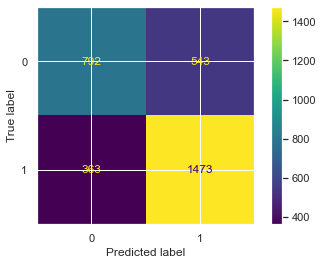

In [180]:
from sklearn.metrics import  ConfusionMatrixDisplay
d = ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_gd))
d.plot()
plt.show()

<Figure size 864x720 with 0 Axes>

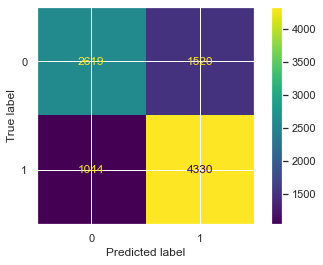

In [182]:
plt.figure(figsize =(12,10))
t = ConfusionMatrixDisplay(confusion_matrix(y_train , y_pred_train_gd))
t.plot()
plt.show()

In [184]:
from sklearn.metrics import roc_auc_score
gbm_roc_auc = roc_auc_score(y_test , y_pred_test_gd)
gbm_roc_auc

0.6977730043328193

In [185]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test , y_pred_test_gd)
display(fpr)
display(tpr)
display(thresholds)

array([0.        , 0.40674157, 1.        ])

array([0.        , 0.80228758, 1.        ])

array([2, 1, 0], dtype=int64)

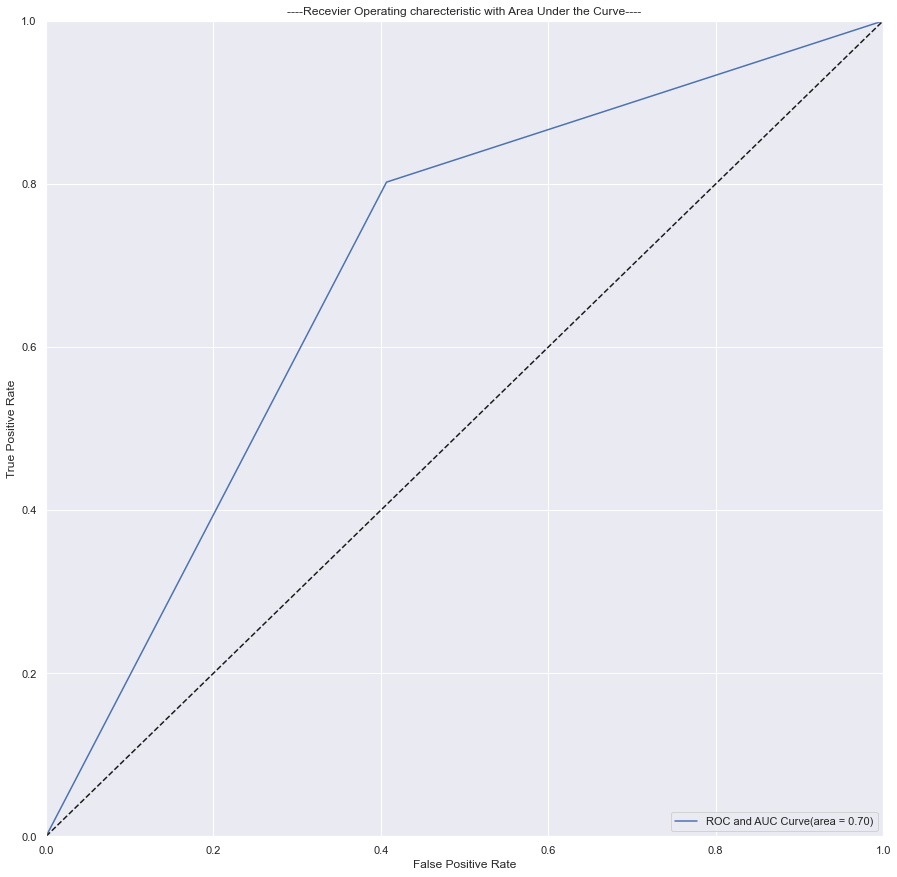

In [186]:
plt.figure(figsize = (15 , 15))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve(area = %0.2f)' %gbm_roc_auc)
plt.plot([0,1] , [0,1] , 'k--')
#plotting against TPR and FPR 
#TPR range is 0 to 1 i.e 0 to 100% hence [0,1]
#similarly for FPR 
plt.xlim([0.0,1.0]) #---> 0 to 100 %
plt.ylim([0.0,1.0]) #---> 0 to 100 %
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()

In [187]:
test_accuracy_logit_scaled = accuracy_score(y_test , y_pred_test_lr)
train_accuracy_logit_scaled = accuracy_score(y_test , y_pred_test_lr)

In [189]:
test_accuracy_logit_unscaled = accuracy_score(y_test , y_pred_test_unscaled)
train_accuracy_logit_unscaled = accuracy_score(y_train , y_pred_train_unscaled)

In [190]:
train_accuracy_dtree = accuracy_score(y_train , y_pred_train_dtree)
test_accuracy_dtree = accuracy_score(y_test , y_pred_test_dtree)

train_accuracy_rf = accuracy_score(y_train , y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test , y_pred_test_rf)

train_accuracy_svm = accuracy_score(y_train , y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test , y_pred_test_svm)

train_accuracy_knn = accuracy_score(y_train , y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test , y_pred_test_knn)

train_accuracy_gbm = accuracy_score(y_train , y_pred_train_gd)
test_accuracy_gbm = accuracy_score(y_test , y_pred_test_gd)

train_accuracy_xgb = accuracy_score(y_train , y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test , y_pred_test_xgb)


train_accuracy_ngb = accuracy_score(y_train , y_pred_train_ngb)
test_accuracy_ngb = accuracy_score(y_test , y_pred_test_ngb)

train_accuracy_nbr = accuracy_score(y_train , y_pred_train_nbr)
test_accuracy_nbr = accuracy_score(y_test , y_pred_test_nbr)

In [191]:
list1 = ['Logit Scaled' , 'Logit Unscaled' , 'Decision Tree' , 'Random Forest' , 'Support Vector' , 'KNN' ,'Gradient boosting',
        'XG Boost' , 'Naives-Guassian' , 'Naives-Bernoulli']

list2 = [train_accuracy_logit_scaled ,train_accuracy_logit_unscaled,train_accuracy_dtree,train_accuracy_rf,train_accuracy_svm,
        train_accuracy_knn,train_accuracy_gbm,train_accuracy_xgb,train_accuracy_ngb,train_accuracy_nbr]

list3 = [test_accuracy_logit_scaled ,test_accuracy_logit_unscaled,test_accuracy_dtree,test_accuracy_rf,test_accuracy_svm,
        test_accuracy_knn,test_accuracy_gbm,test_accuracy_xgb,test_accuracy_ngb,test_accuracy_nbr]

             ML ALGO  Train Accuracy  Test Accuracy
0       Logit Scaled        0.671397       0.671397
1     Logit Unscaled        0.690844       0.669505
2      Decision Tree        0.991590       0.685273
3      Random Forest        0.991590       0.748660
4     Support Vector        0.564911       0.578997
5                KNN        0.777357       0.654052
6  Gradient boosting        0.730474       0.714286
7           XG Boost        0.900767       0.754336
8    Naives-Guassian        0.615263       0.599811
9   Naives-Bernoulli        0.663303       0.643646
AxesSubplot(0.125,0.125;0.775x0.755)


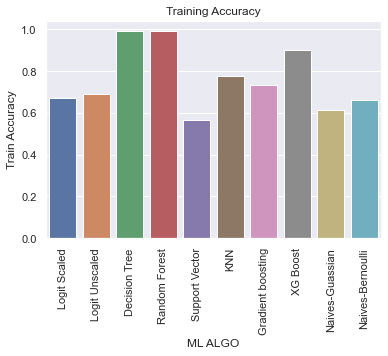

In [193]:
accuracy_df = pd.DataFrame({'ML ALGO': list1 , 'Train Accuracy' : list2 ,
                            'Test Accuracy' : list3})

print(accuracy_df)

charts = sns.barplot(x = 'ML ALGO' , y = 'Train Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Training Accuracy')
print(charts)

AxesSubplot(0.125,0.125;0.775x0.755)


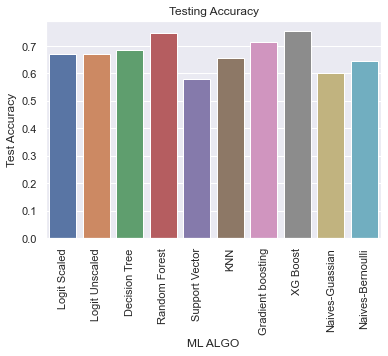

In [194]:
charts = sns.barplot(x = 'ML ALGO' , y = 'Test Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Testing Accuracy')
print(charts)

In [195]:
# Gradient Boosting Classifer is giving a good result 


In [206]:
cm = confusion_matrix(y_test , y_pred_test_gd)
pd.crosstab(y_test.values.flatten(), y_pred_test_gd, rownames=['Actual'], colnames=['Predicted'], margins = True)


Predicted,0,1,All
Actual,,,
0,792,543,1335
1,363,1473,1836
All,1155,2016,3171


* Customers who did not use Coupons in actual are 1335
* Customers who did  use Coupons in actual are 1836

* Predictions 

* Precited customers who did not use coupons are 1155
* Precited customers who did  use coupons are 2016

In [207]:
lr_roc_auc = roc_auc_score(y_test , y_pred_test_lr)
dtree_roc_auc = roc_auc_score(y_test , y_pred_test_dtree)
rf_roc_auc = roc_auc_score(y_test , y_pred_test_rf)
svm_roc_auc = roc_auc_score(y_test , y_pred_test_svm)
knn_roc_auc = roc_auc_score(y_test , y_pred_test_knn)
xgb_roc_auc = roc_auc_score(y_test , y_pred_test_xgb)
ngb_roc_auc = roc_auc_score(y_test , y_pred_test_ngb)
nbr_roc_auc = roc_auc_score(y_test , y_pred_test_nbr)

In [208]:
fpr,tpr,thresholds = roc_curve(y_test , y_pred_test_gd)
fpr1,tpr1,thresholds = roc_curve(y_test , y_pred_test_lr)
fpr2,tpr2,thresholds = roc_curve(y_test , y_pred_test_dtree)
fpr3,tpr3,thresholds = roc_curve(y_test , y_pred_test_rf)
fpr4,tpr4,thresholds = roc_curve(y_test , y_pred_test_svm)
fpr5,tpr5,thresholds = roc_curve(y_test , y_pred_test_knn)
fpr6,tpr6,thresholds = roc_curve(y_test , y_pred_test_xgb)
fpr7,tpr7,thresholds = roc_curve(y_test , y_pred_test_ngb)
fpr8,tpr8,thresholds = roc_curve(y_test , y_pred_test_nbr)


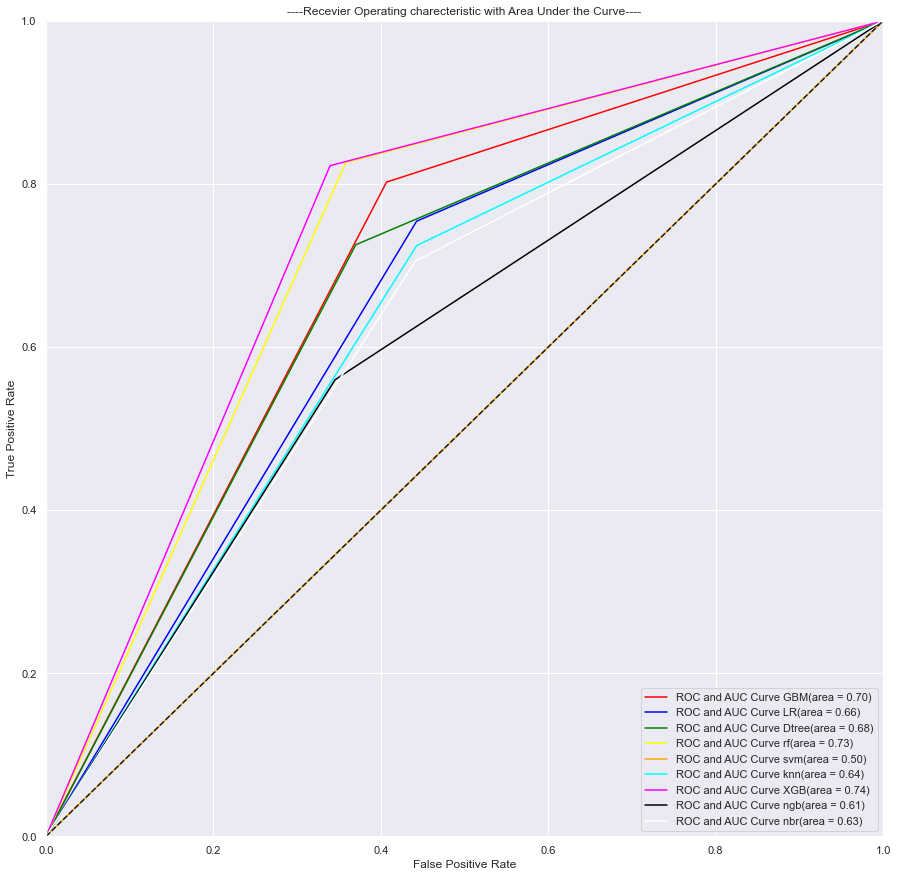

In [209]:
plt.figure(figsize = (15 , 15))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve GBM(area = %0.2f)' %gbm_roc_auc,color = 'red')
plt.plot(fpr1, tpr1, label = 'ROC and AUC Curve LR(area = %0.2f)' %lr_roc_auc , color = 'blue')
plt.plot(fpr2, tpr2, label = 'ROC and AUC Curve Dtree(area = %0.2f)' %dtree_roc_auc , color = 'green')
plt.plot(fpr3, tpr3, label = 'ROC and AUC Curve rf(area = %0.2f)' %rf_roc_auc , color = 'yellow')
plt.plot(fpr4, tpr4, label = 'ROC and AUC Curve svm(area = %0.2f)' %svm_roc_auc , color = 'orange')
plt.plot(fpr5, tpr5, label = 'ROC and AUC Curve knn(area = %0.2f)' %knn_roc_auc , color = 'cyan')
plt.plot(fpr6, tpr6, label = 'ROC and AUC Curve XGB(area = %0.2f)' %xgb_roc_auc , color = 'magenta')
plt.plot(fpr7, tpr7, label = 'ROC and AUC Curve ngb(area = %0.2f)' %ngb_roc_auc , color = 'black')
plt.plot(fpr8, tpr8, label = 'ROC and AUC Curve nbr(area = %0.2f)' %nbr_roc_auc , color = 'white')
plt.plot([0,1] , [0,1] , 'k--')
#plotting against TPR and FPR 
#TPR range is 0 to 1 i.e 0 to 100% hence [0,1]
#similarly for FPR 
plt.xlim([0.0,1.0]) #---> 0 to 100 %
plt.ylim([0.0,1.0]) #---> 0 to 100 %
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()

In [210]:
accuracy_df.to_csv('accuracy_df.csv')

In [211]:
training_accuracy_cv_xgb = cross_val_score(xgb , x_train , y_train , cv = 10)
testing_accuracy_cv_xgb = cross_val_score(xgb , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy_cv_xgb )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_xgb )
print()
print('***************')
print()

training_accuracy [0.75315126 0.75735294 0.7342437  0.76235542 0.75814932 0.76445846
 0.74763407 0.76761304 0.75289169 0.76025237]
***************
testing_accuracy [0.70440252 0.63091483 0.75078864 0.69716088 0.70347003 0.66876972
 0.73817035 0.72870662 0.7192429  0.71608833]

***************



In [212]:
print('training_accuracy', training_accuracy_cv_xgb.mean() )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_xgb.mean()) 

training_accuracy 0.7558102262987213
***************
testing_accuracy 0.7057714818562387


In [213]:
print('training accu xgb :' , accuracy_score(y_train , y_pred_train_xgb))
print('testing accu xgb :' , accuracy_score(y_test , y_pred_test_xgb))

training accu xgb : 0.9007673709660464
testing accu xgb : 0.7543361715547146


In [ ]:
training_accuracy_mean 0.7558102262987213
***************
testing_accuracy_mean 0.7057714818562387

In [214]:
training_accuracy_cv_rf = cross_val_score(rf , x_train , y_train , cv = 10)
testing_accuracy_cv_rf = cross_val_score(rf , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy_cv_rf )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_rf )
print()
print('***************')
print()

training_accuracy [0.74789916 0.73214286 0.71953782 0.75920084 0.75184017 0.76971609
 0.72450053 0.75814932 0.75499474 0.75814932]
***************
testing_accuracy [0.68238994 0.63722397 0.71293375 0.70031546 0.68138801 0.70662461
 0.71293375 0.68769716 0.66876972 0.72870662]

***************



In [215]:
print('training_accuracy', training_accuracy_cv_rf.mean() )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_rf.mean())

training_accuracy 0.7476130830881248
***************
testing_accuracy 0.6918982997043828
